In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [74]:
df = pd.read_csv('2019_Departmental_Self-Assessment.csv', index_col=[1,0])
df.fillna("I don't know", inplace=True)
df.replace("I don't know.", "I don't know", inplace=True)
df.sort_index(inplace=True)
df

Recruiting members of underrepresented groups  \
What is your role in the department? Timestamp                                                               
Faculty                              1/19/2019 10:18:54                                       I don't know   
                                     1/19/2019 14:27:04  Emerging: Departmental website encourages wome...   
                                     1/20/2019 13:43:20  Transforming: Department hosts or participates...   
                                     1/23/2019 12:16:06  Transforming: Department hosts or participates...   
                                     1/23/2019 22:32:27  Developing: Department members attend conferen...   
                                     1/24/2019 16:26:16                                       I don't know   
                                     1/24/2019 18:44:26  Transforming: Department hosts or participates...   
Graduate Student                     1/19/2019 10:48:46  Transforming: Department hosts or participates...   
                                     1/19/2019 11:43:29  Emerging: Departmental website encourages wome...   
                                     1/19/2019 12:18:51                                       I don't know   
                                     1/19/2019 13:41:36  Emerging: Departmental website encourages wome...   
                                     1/19/2019 18:37:22                                       I don't know   
                                     1/21/2019 11:10:03  Emerging: Departmental website encourages wome...   
                                     1/21/2019 12:12:12  Developing: Department members attend conferen...   
                                     1/21/2019 8:46:11   Transforming: Department hosts or participates...   
                                     1/22/2019 14:12:31                                       I don't know   
                                     1/22/2019 22:52:29  Emerging: Departmental website encourages wome...   
                                     1/22/2019 7:37:00   Transforming: Department hosts or participates...   
                                     1/23/2019 11:53:11  Transforming: Department hosts or participates...   
                                     1/23/2019 12:45:31  Developing: Department members attend conferen...   
                                     1/23/2019 12:48:56  Transforming: Department hosts or participates...   
                                     1/23/2019 13:20:21                                       I don't know   
                                     1/23/2019 14:07:38  Emerging: Departmental website encourages wome...   
                                     1/23/2019 19:15:10  Transforming: Department hosts or participates...   
                                     1/23/2019 7:49:04   Emerging: Departmental website encourages wome...   
Post-doc                             1/20/2019 9:42:29   Developing: Department members attend conferen...   
                                     1/22/2019 9:37:53                                        I don't know   
                                     1/23/2019 12:29:01  Emerging: Departmental website encourages wome...   
                                     1/23/2019 17:39:56  Developing: Department members attend conferen...   
Staff Scientist                      1/23/2019 11:51:19  Emerging: Departmental website encourages wome...   
                                     1/23/2019 12:14:15                                       I don't know   
                                     1/23/2019 14:46:29                                       I don't know   

                                                                                  Non-cognitive assessment  \
What is your role in the department? Timestamp                                                               
Faculty                              1/19/2019 10:18:54  Transforming: Interviewers are trained in n

In [75]:
questions = df.keys()[:-1]
print(questions)

Index(['Recruiting members of underrepresented groups',
       'Non-cognitive assessment', 'Use of GRE', 'Letters of recommendation',
       'Unconscious bias', 'Assignment', 'Guidelines and training',
       'Evaluation and feedback', 'Students with marginalized identities',
       'Professional development', 'Mentoring networks', 'Financial support',
       'Teaching experience', 'Fostering equitable teaching practice',
       'Conference participation', 'Family-friendly policies',
       'Communications', 'Training',
       'Ending workplace harassment and bullying',
       'Creating welcoming environments', 'Community dialogues',
       'Faculty hiring', 'Department internal review',
       'Department external review', 'Individual performance review',
       'Data collection', 'Strategic planning and response',
       'Internal reporting', 'Public reporting', 'Certification',
       'Sustainability'],
      dtype='object')


In [76]:
df.index

MultiIndex(levels=[['Faculty', 'Graduate Student', 'Post-doc', 'Staff Scientist'], ['1/19/2019 10:18:54', '1/19/2019 10:48:46', '1/19/2019 11:43:29', '1/19/2019 12:18:51', '1/19/2019 13:41:36', '1/19/2019 14:27:04', '1/19/2019 18:37:22', '1/20/2019 13:43:20', '1/20/2019 9:42:29', '1/21/2019 11:10:03', '1/21/2019 12:12:12', '1/21/2019 8:46:11', '1/22/2019 14:12:31', '1/22/2019 22:52:29', '1/22/2019 7:37:00', '1/22/2019 9:37:53', '1/23/2019 11:51:19', '1/23/2019 11:53:11', '1/23/2019 12:14:15', '1/23/2019 12:16:06', '1/23/2019 12:29:01', '1/23/2019 12:45:31', '1/23/2019 12:48:56', '1/23/2019 13:20:21', '1/23/2019 14:07:38', '1/23/2019 14:46:29', '1/23/2019 17:39:56', '1/23/2019 19:15:10', '1/23/2019 22:32:27', '1/23/2019 7:49:04', '1/24/2019 16:26:16', '1/24/2019 18:44:26']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3], [0, 5, 7, 19, 28, 30, 31, 1, 2, 3, 4, 6, 9, 10, 11, 12, 13, 14, 17, 21, 22, 23, 24, 27, 29, 8, 15,

In [77]:
# grads = df.loc['Graduate Student']
# faculty = df.loc['Faculty']
# postdocs = df.loc['Post-doc']
# staff = df.loc['Staff Scientist']

In [78]:
# grads

Recruiting members of underrepresented groups  \
Timestamp                                                               
1/19/2019 10:48:46  Transforming: Department hosts or participates...   
1/19/2019 11:43:29  Emerging: Departmental website encourages wome...   
1/19/2019 12:18:51                                       I don't know   
1/19/2019 13:41:36  Emerging: Departmental website encourages wome...   
1/19/2019 18:37:22                                       I don't know   
1/21/2019 11:10:03  Emerging: Departmental website encourages wome...   
1/21/2019 12:12:12  Developing: Department members attend conferen...   
1/21/2019 8:46:11   Transforming: Department hosts or participates...   
1/22/2019 14:12:31                                       I don't know   
1/22/2019 22:52:29  Emerging: Departmental website encourages wome...   
1/22/2019 7:37:00   Transforming: Department hosts or participates...   
1/23/2019 11:53:11  Transforming: Department hosts or participates...   
1/23/2019 12:45:31  Developing: Department members attend conferen...   
1/23/2019 12:48:56  Transforming: Department hosts or participates...   
1/23/2019 13:20:21                                       I don't know   
1/23/2019 14:07:38  Emerging: Departmental website encourages wome...   
1/23/2019 19:15:10  Transforming: Department hosts or participates...   
1/23/2019 7:49:04   Emerging: Departmental website encourages wome...   

                                             Non-cognitive assessment  \
Timestamp                                                               
1/19/2019 10:48:46  Developing: Department interviews women and mi...   
1/19/2019 11:43:29  Developing: Department interviews women and mi...   
1/19/2019 12:18:51                                       I don't know   
1/19/2019 13:41:36                                       I don't know   
1/19/2019 18:37:22                                       I don't know   
1/21/2019 11:10:03  Developing: Department interviews women and mi...   
1/21/2019 12:12:12  Developing: Department interviews women and mi...   
1/21/2019 8:46:11   Developing: Department interviews women and mi...   
1/22/2019 14:12:31                                       I don't know   
1/22/2019 22:52:29  Developing: Department interviews women and mi...   
1/22/2019 7:37:00   Transforming: Interviewers are trained in non-...   
1/23/2019 11:53:11  Developing: Department interviews women and mi...   
1/23/2019 12:45:31  Developing: Department interviews women and mi...   
1/23/2019 12:48:56                                       I don't know   
1/23/2019 13:20:21  Developing: Department interviews women and mi...   
1/23/2019 14:07:38  Emerging: Faculty recognize the importance of ...   
1/23/2019 19:15:10  Developing: Department interviews women and mi...   
1/23/2019 7:49:04   Emerging: Faculty recognize the importance of ...   

                                                           Use of GRE  \
Timestamp                                                               
1/19/2019 10:48:46  Transforming: Department has studied predictiv...   
1/19/2019 11:43:29  Developing: Physics GRE is optional, and commi...   
1/19/2019 12:18:51  Developing: Physics GRE is optional, and commi...   
1/19/2019 13:41:36  Developing: Physics GRE is optional, and commi...   
1/19/2019 18:37:22                                       I don't know   
1/21/2019 11:10:03  Developing: Physics GRE is optional, and commi...   
1/21/2019 12:12:12  Developing: Physics GRE is optional, and commi...   
1/21/2019 8:46:11   Developing: Physics GRE is optional, and commi...   
1/22/2019 14:12:31  Developing: Physics GRE is optional, and commi...   
1/22/2019 22:52:29  Developing: Physics GRE is optional, and commi...   
1/22/2019 7:37:00   Transforming: Department has studied predictiv...   
1/23/2019 11:53:11  Developing: Physics GRE is optional, and commi...   
1/23/2019 12:45:31  Developing: Physics GRE is optional, and commi...   
1/23/20

In [86]:
# grads.shape

In [87]:
def dataframe_values(df):
    
    dictionary = dict()

    for question in df.keys():
        dictionary[question] = dict()
        
#         possible_answers = set(df[question])
        
        possible_answers = ['Emerging', 'Developing', 'Transforming', "I don't know"]
        
        for answer in possible_answers:
            value = np.sum(df[question].str.startswith(answer))
            dictionary[question][answer] = value
        
    
    return dictionary

In [88]:
# grads1 = grad_values['Recruiting members of underrepresented groups']
# grads1.values()

# faculty1 = faculty_values['Recruiting members of underrepresented groups']
# faculty1.values()

# total1 = total_values['Recruiting members of underrepresented groups']
# total1.values()

In [89]:
def func(pct, allvals):
    if pct == 0:
        return
    allvals = np.array(list(allvals))
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.0f}%\n({:d} votes)".format(pct, absolute)

In [93]:
def labels_in_order(old_dictionary):
    new_dictionary={}
    new_dictionary['Emerging'] = old_dictionary['Emerging']
    new_dictionary['Developing'] = old_dictionary['Developing']
    new_dictionary['Transforming'] = old_dictionary['Transforming']
    new_dictionary["I don't know"] = old_dictionary["I don't know"]
    
    return new_dictionary
                   

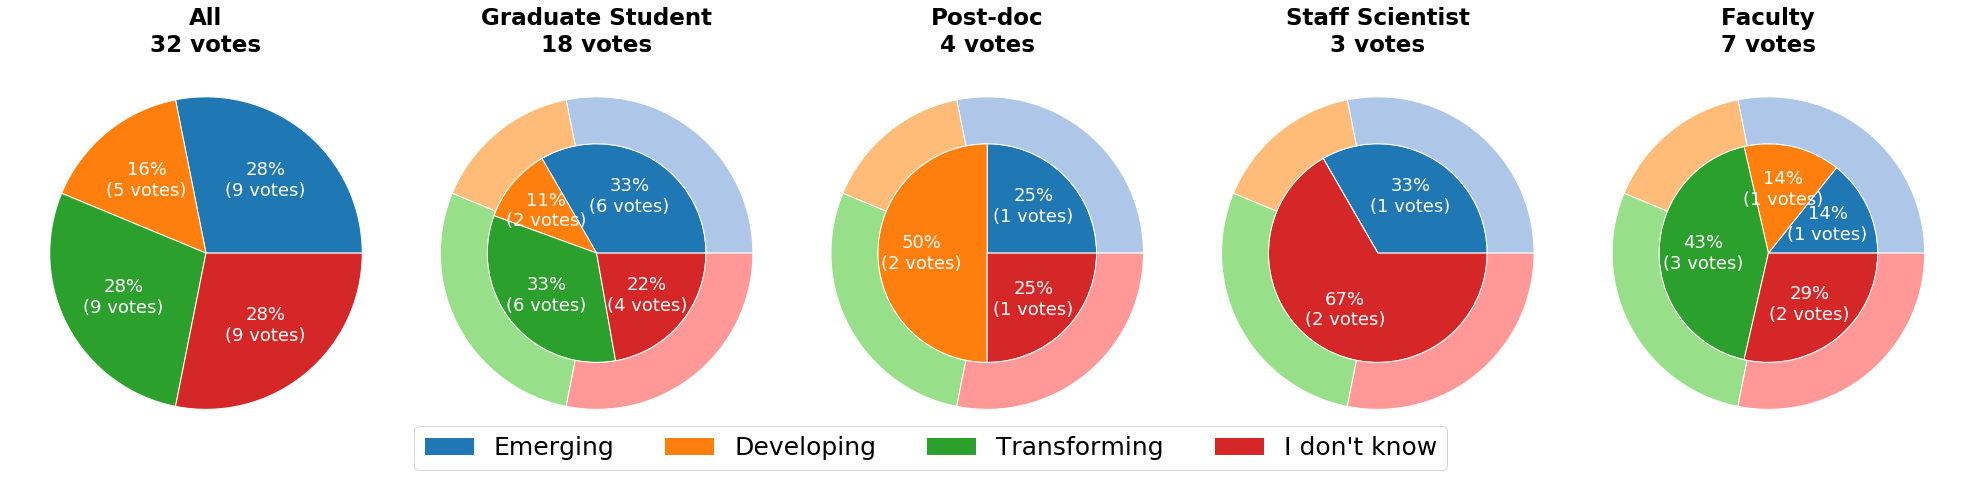

In [94]:
size=0.3
cmap = plt.get_cmap("tab20")
inner_colors = cmap(np.arange(4)*2)
outer_colors = cmap((np.arange(4)*2)+1)


fig, axes = plt.subplots(1,5, figsize=[35,10], gridspec_kw=dict(wspace=0))

question = 'Recruiting members of underrepresented groups'

for ax, label in zip(axes,['All', 'Graduate Student', 'Post-doc', 'Staff Scientist', 'Faculty']):
    
    if label == 'All':
        df_group = df
        df_values_all = dataframe_values(df_group)[question]
        
        ax.pie(df_values_all.values(), autopct=lambda pct: func(pct, df_values_all.values()),
            radius=1, colors=inner_colors,
            wedgeprops=dict(edgecolor='w'),  textprops=dict(color="w", fontsize=18))
        ax.set(aspect="equal")
        ax.set_title(label+'\n{0} votes'.format(sum(df_values_all.values())), fontsize=23, fontweight='bold')
        
    else:
        df_group = df.loc[label]
        
        
        df_group_values = dataframe_values(df_group)[question]
        
        ax.pie(df_group_values.values(), autopct=lambda pct: func(pct, df_group_values.values()),
            radius=1-size, colors=inner_colors,
            wedgeprops=dict(edgecolor='w'), textprops=dict(color="w", fontsize=18))
        ax.pie(df_values_all.values(), radius=1, colors=outer_colors,
               wedgeprops=dict(width=size, edgecolor='w'))
        ax.set(aspect="equal")
        ax.set_title(label+'\n{0} votes'.format(sum(df_group_values.values())), fontsize=23, fontweight='bold')



plt.legend(labels = ['Emerging', 'Developing', 'Transforming', "I don't know"], ncol=4,
              bbox_to_anchor=(0.7, 0.28), bbox_transform=plt.gcf().transFigure, fontsize=25)
# fig.tight_layout()

# plt.savefig('plots/{0}.png'.format(question), bbox_inches='tight')

plt.show()

Recruiting members of underrepresented groups


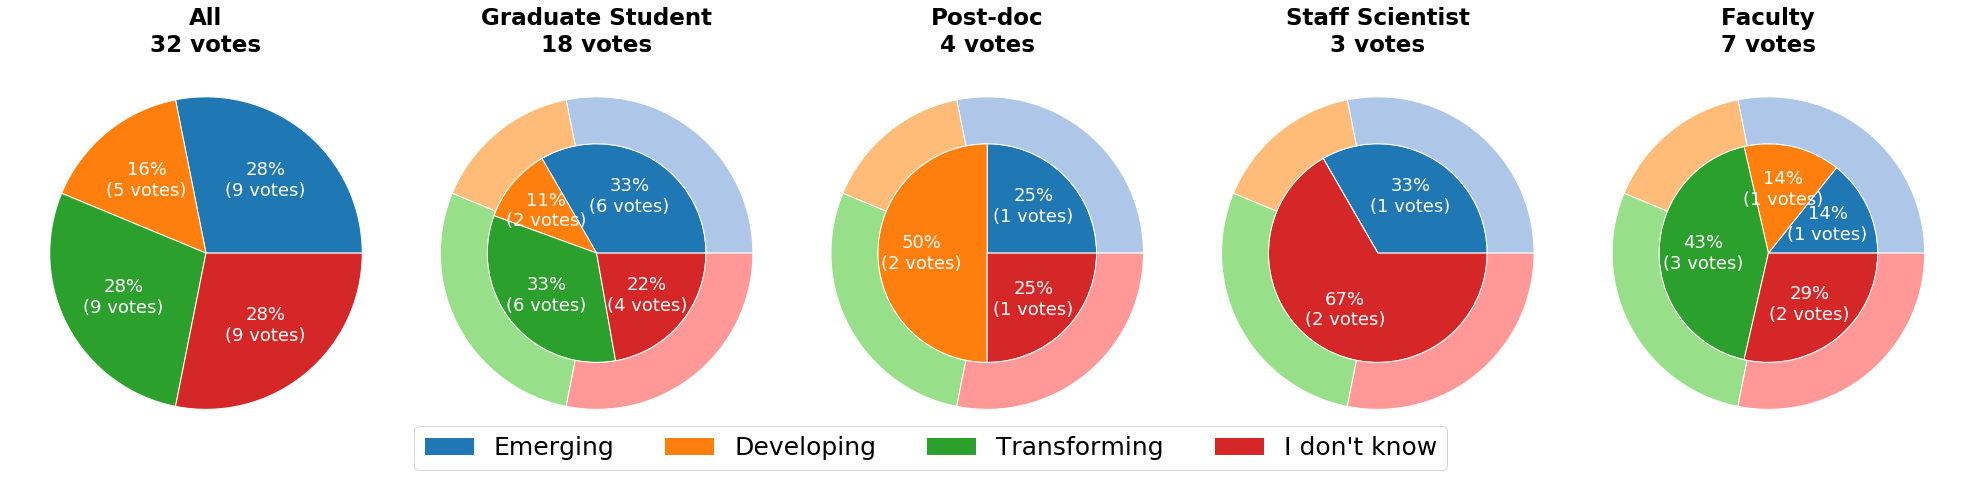

Non-cognitive assessment


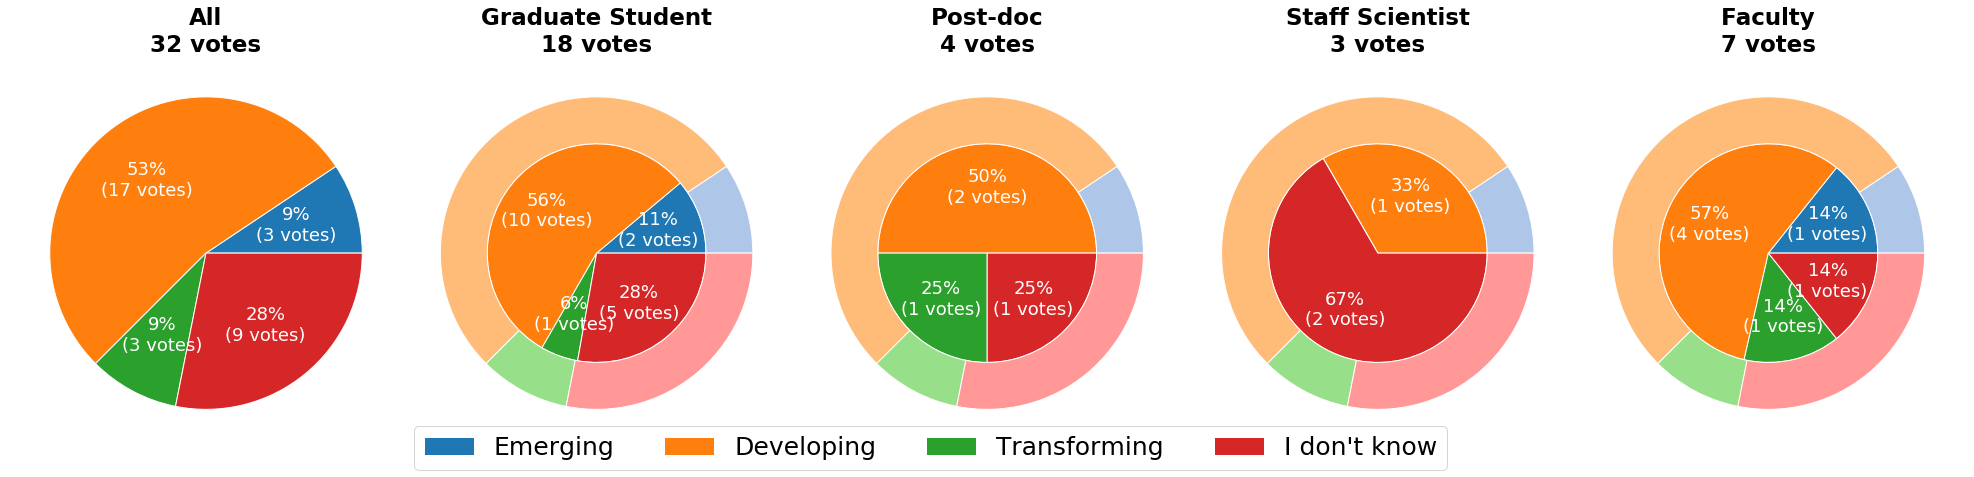

Use of GRE


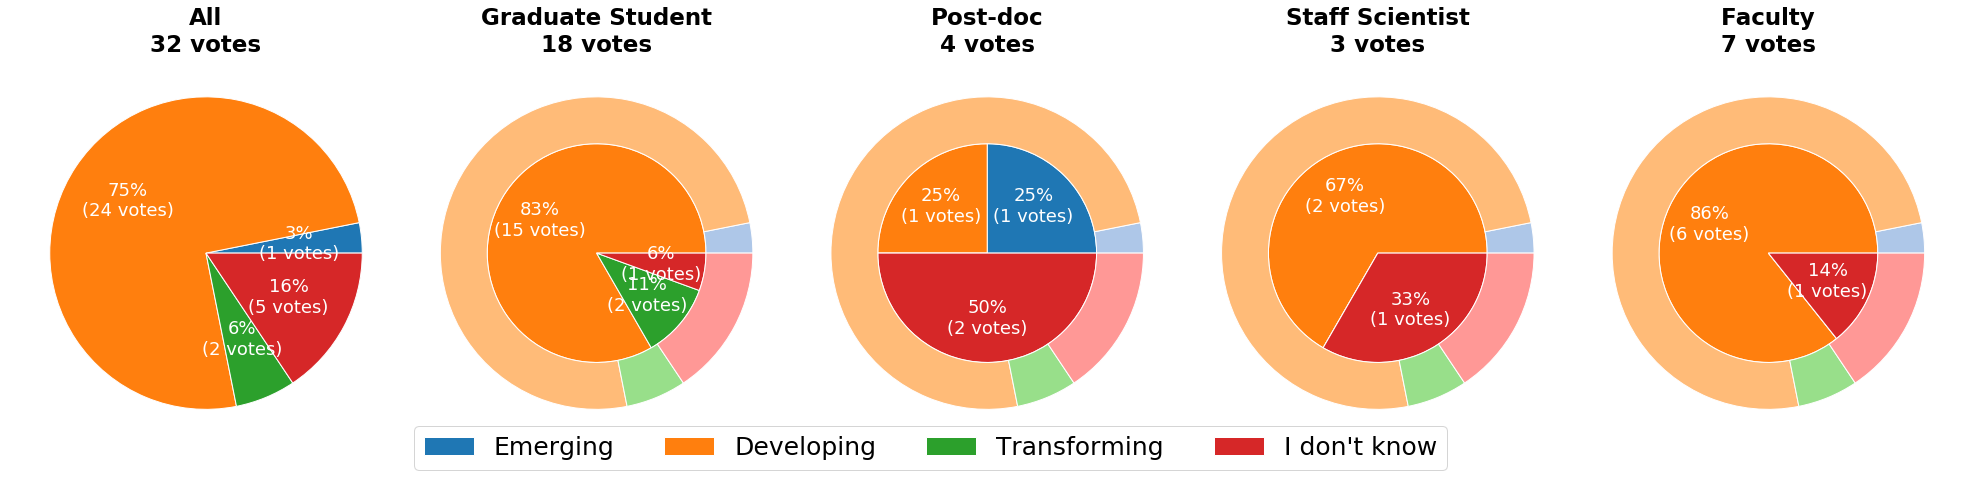

Letters of recommendation


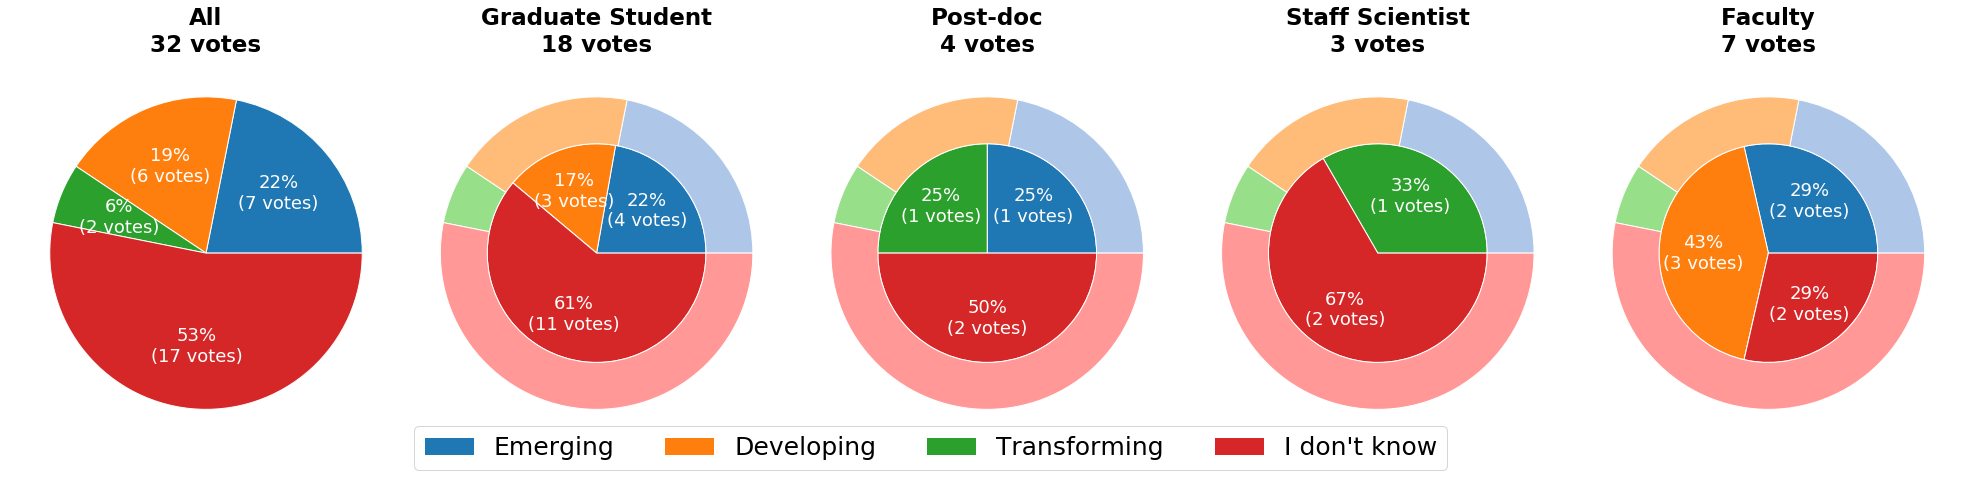

Unconscious bias


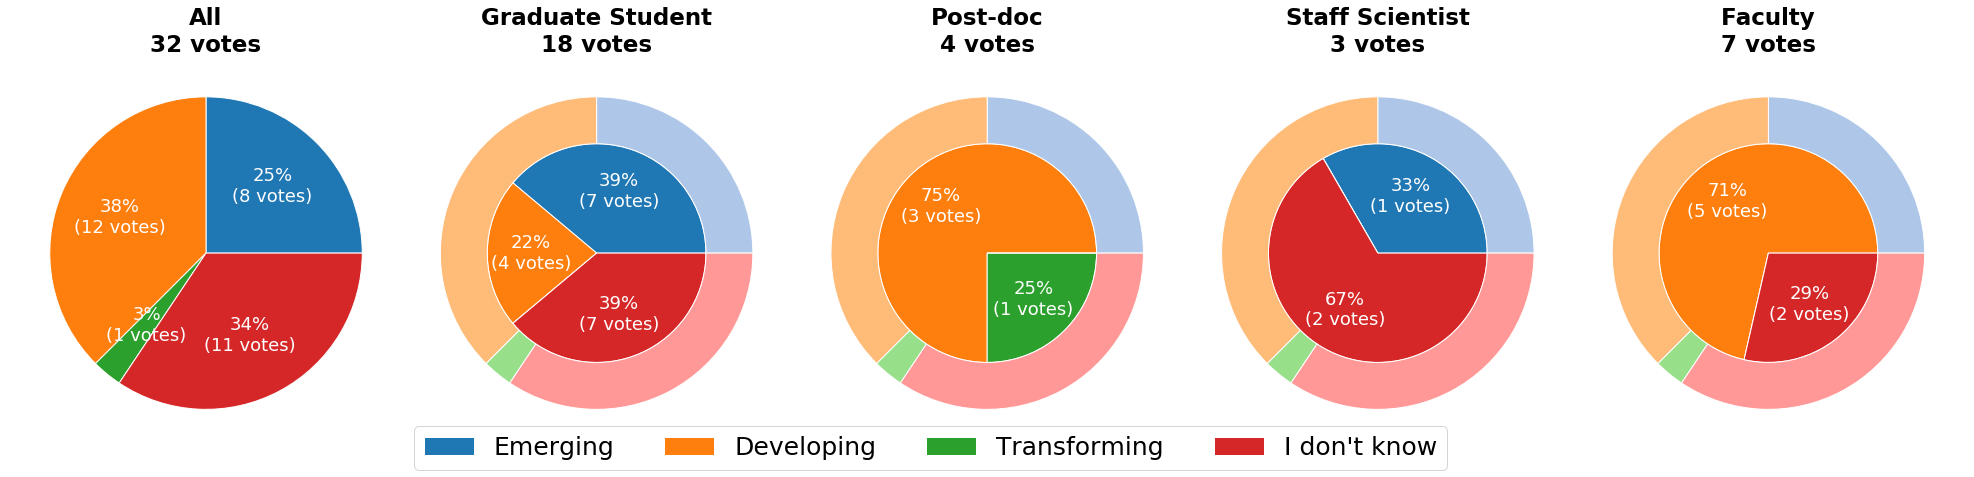

Assignment


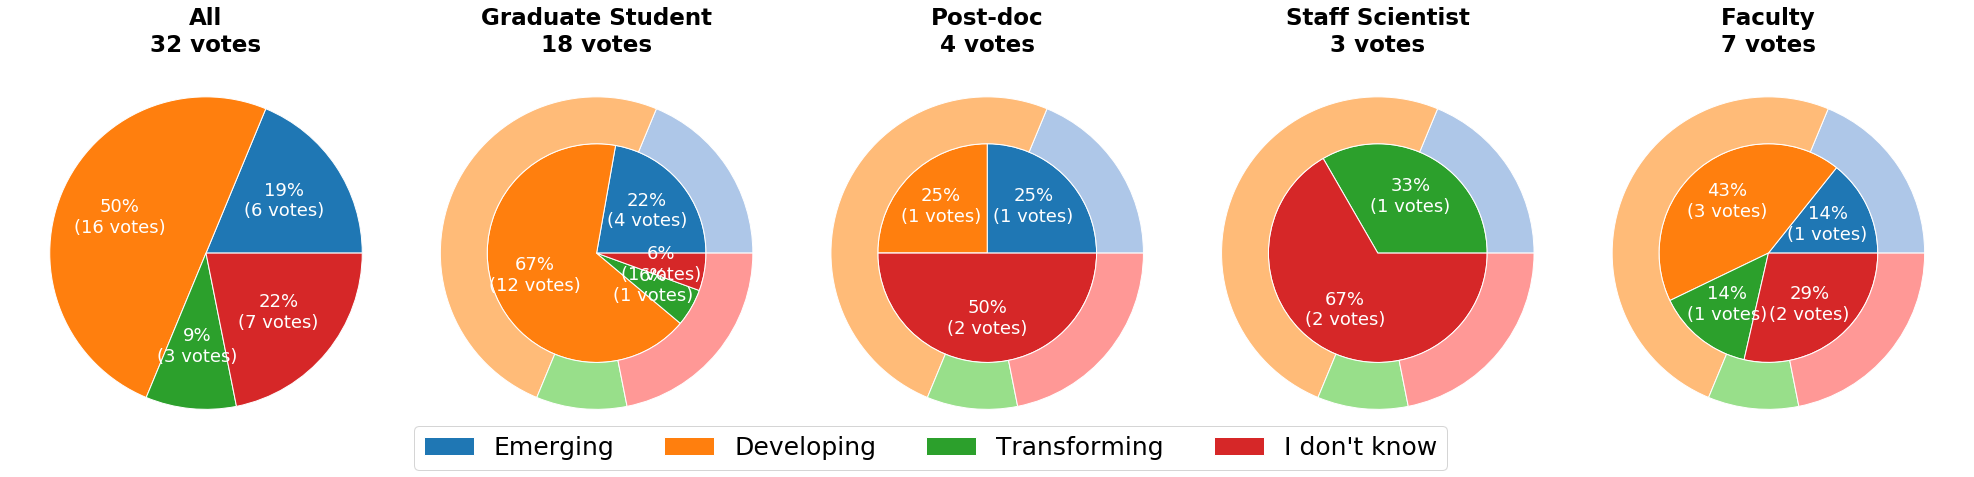

Guidelines and training


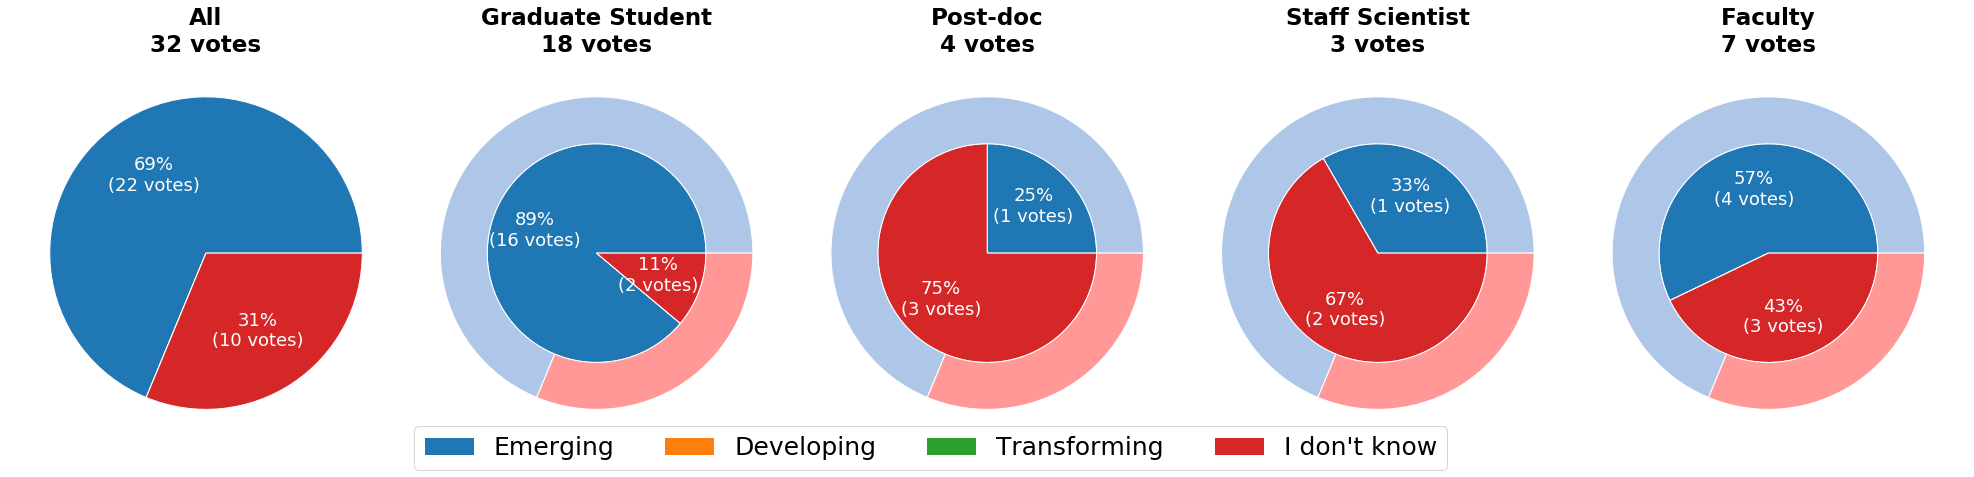

Evaluation and feedback


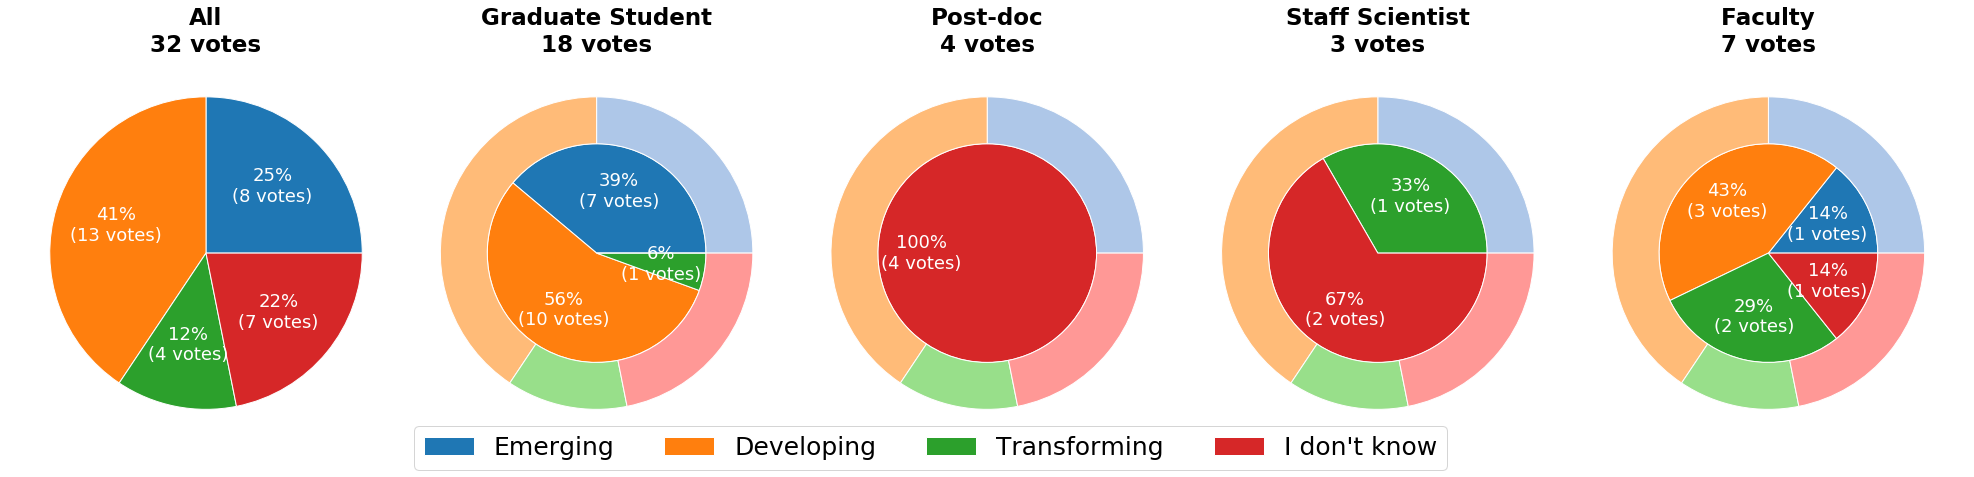

Students with marginalized identities


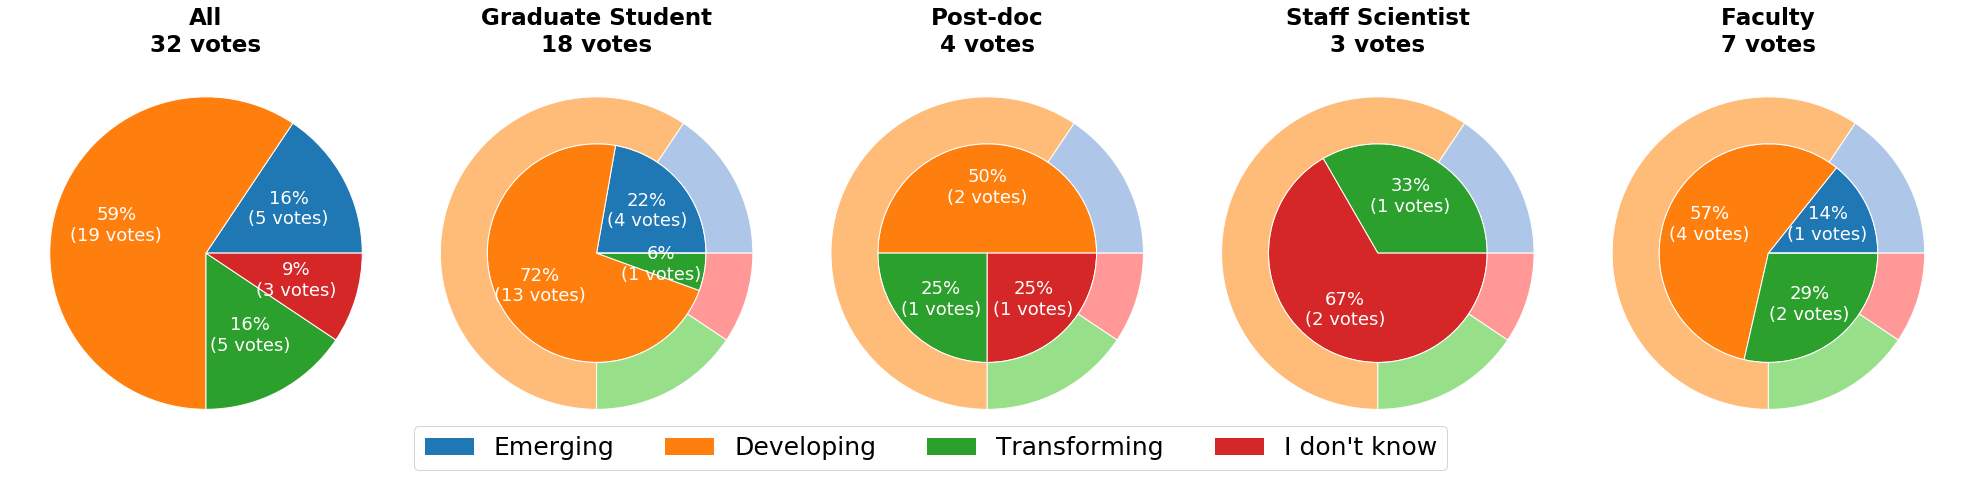

Professional development


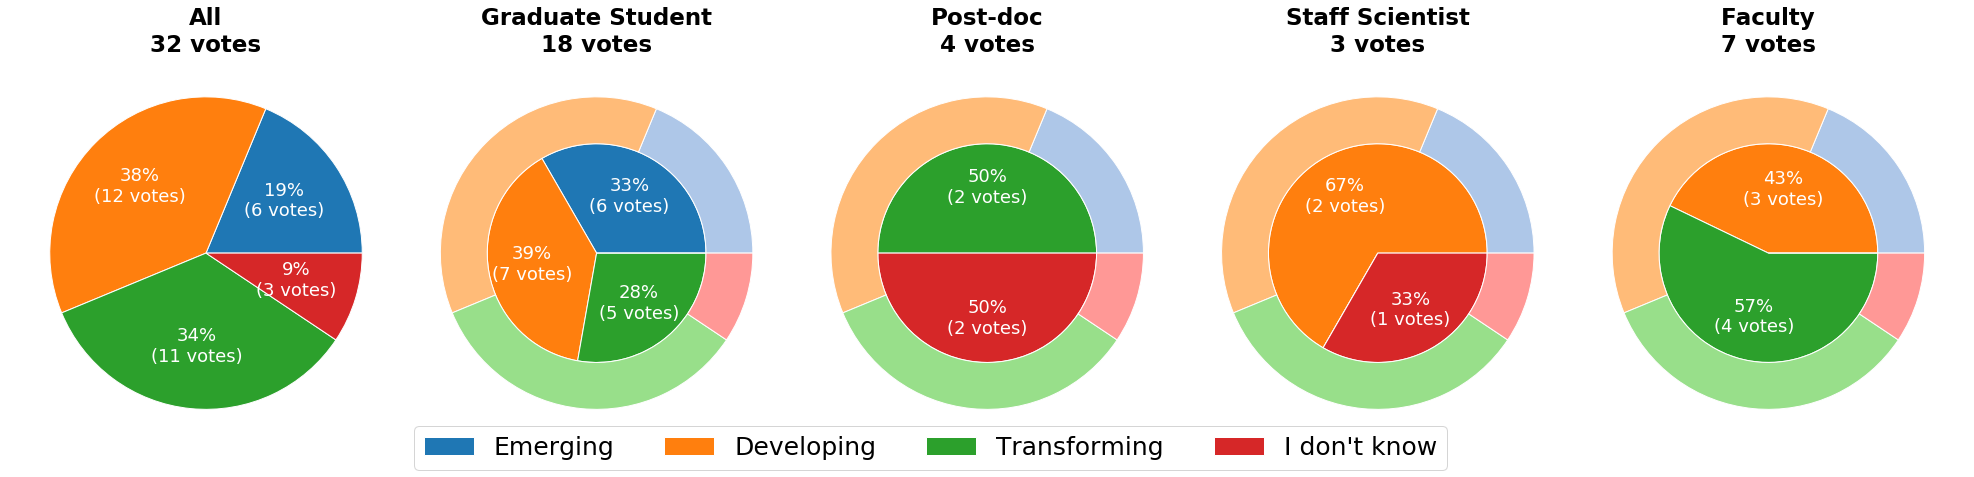

Mentoring networks


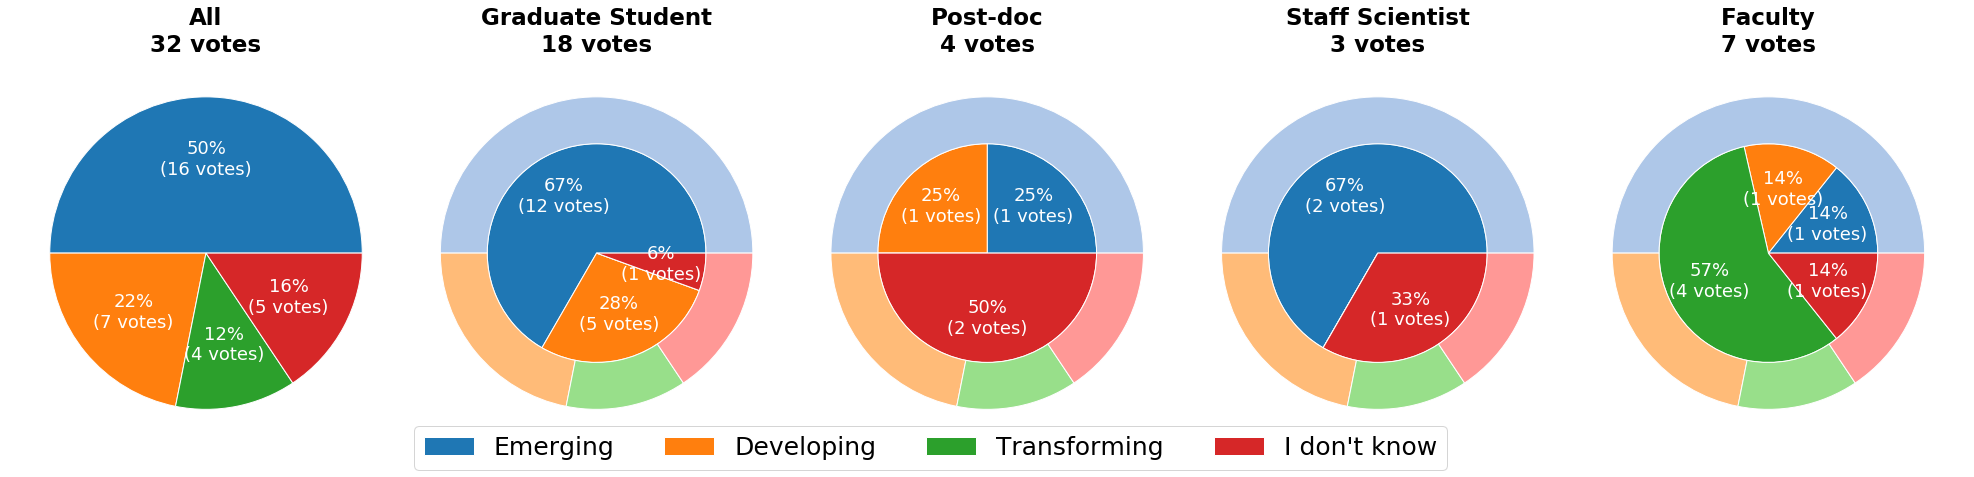

Financial support


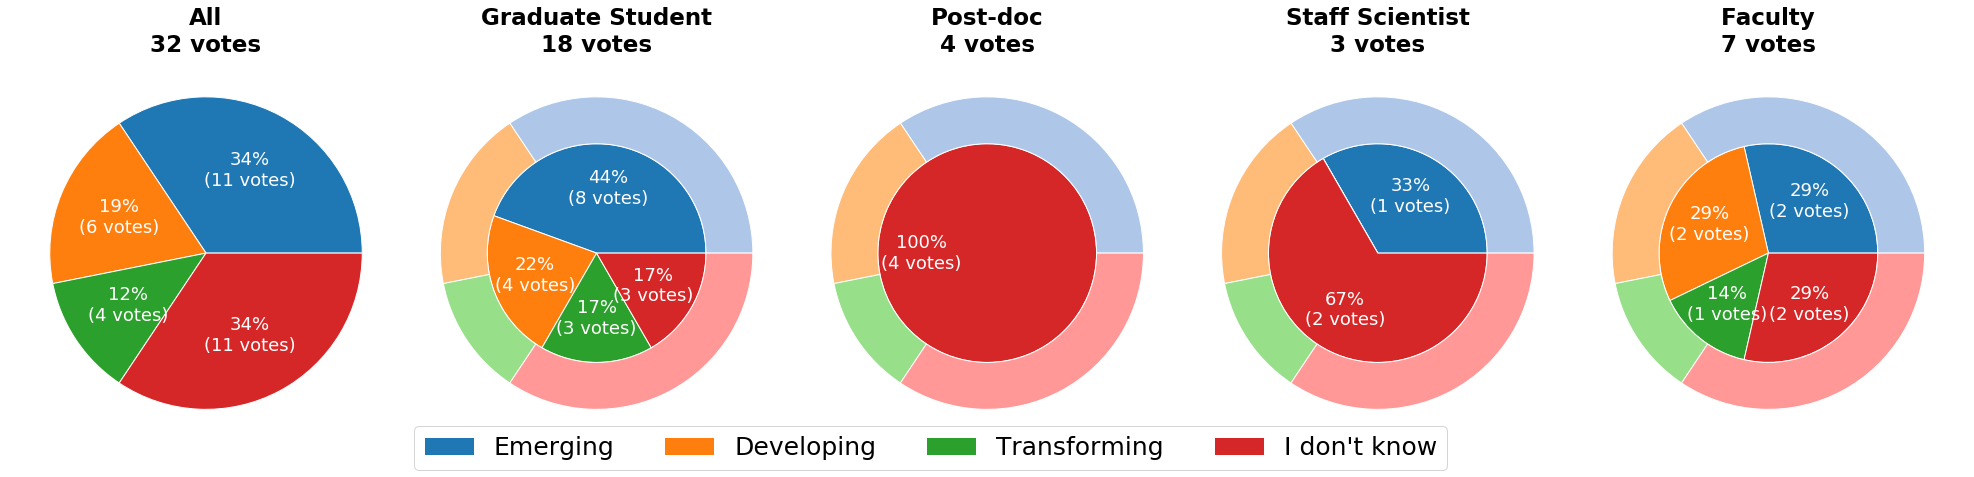

Teaching experience


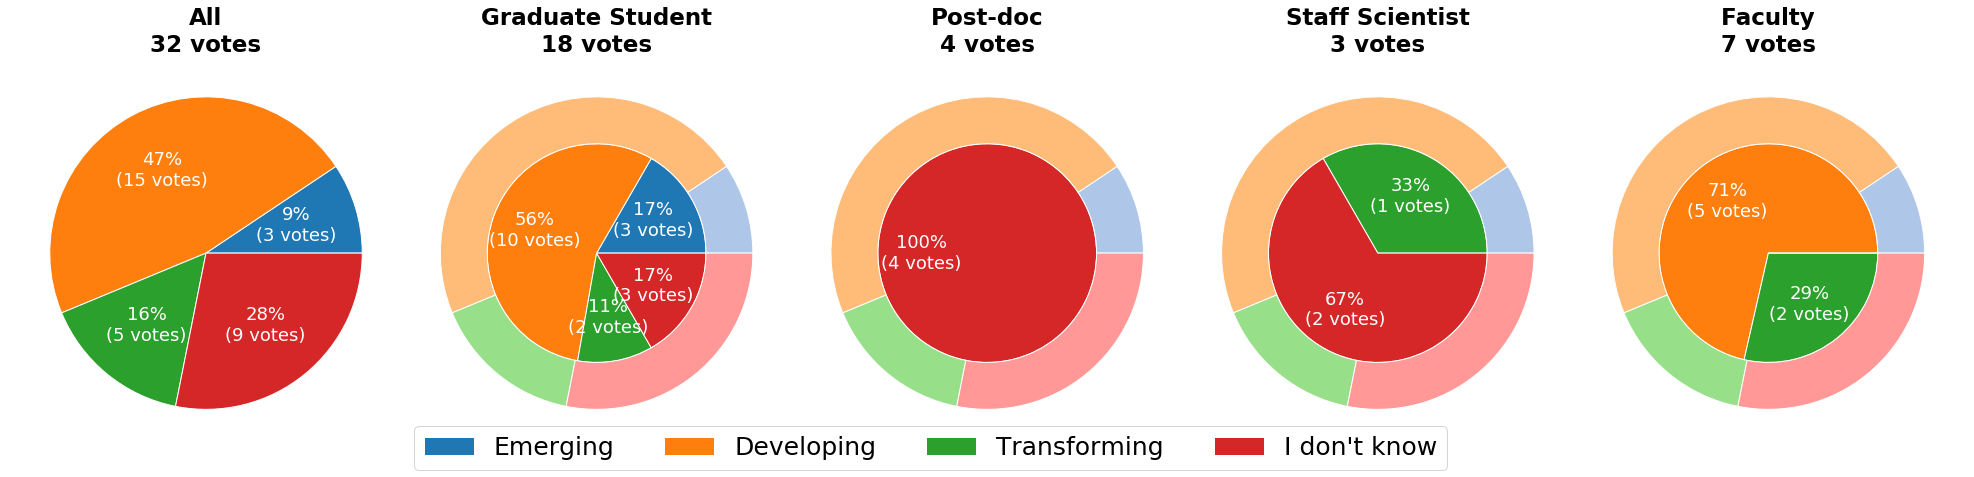

Fostering equitable teaching practice


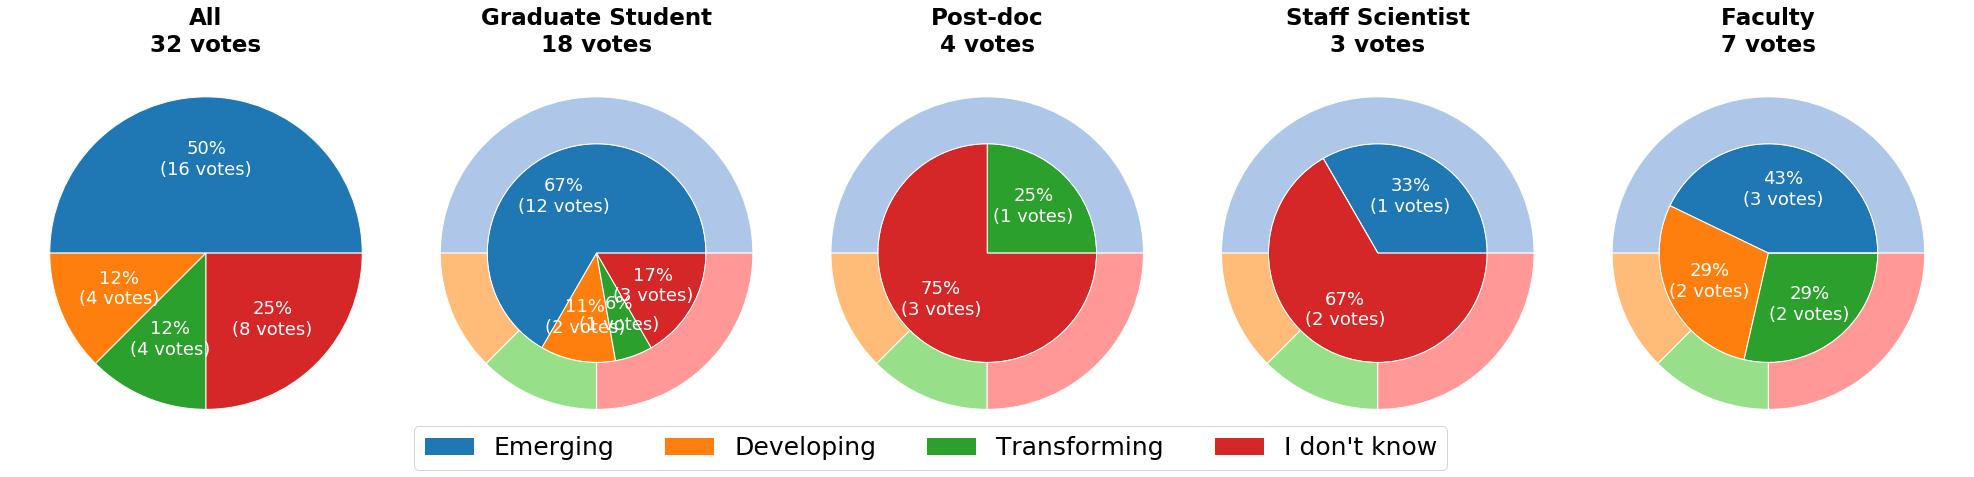

Conference participation


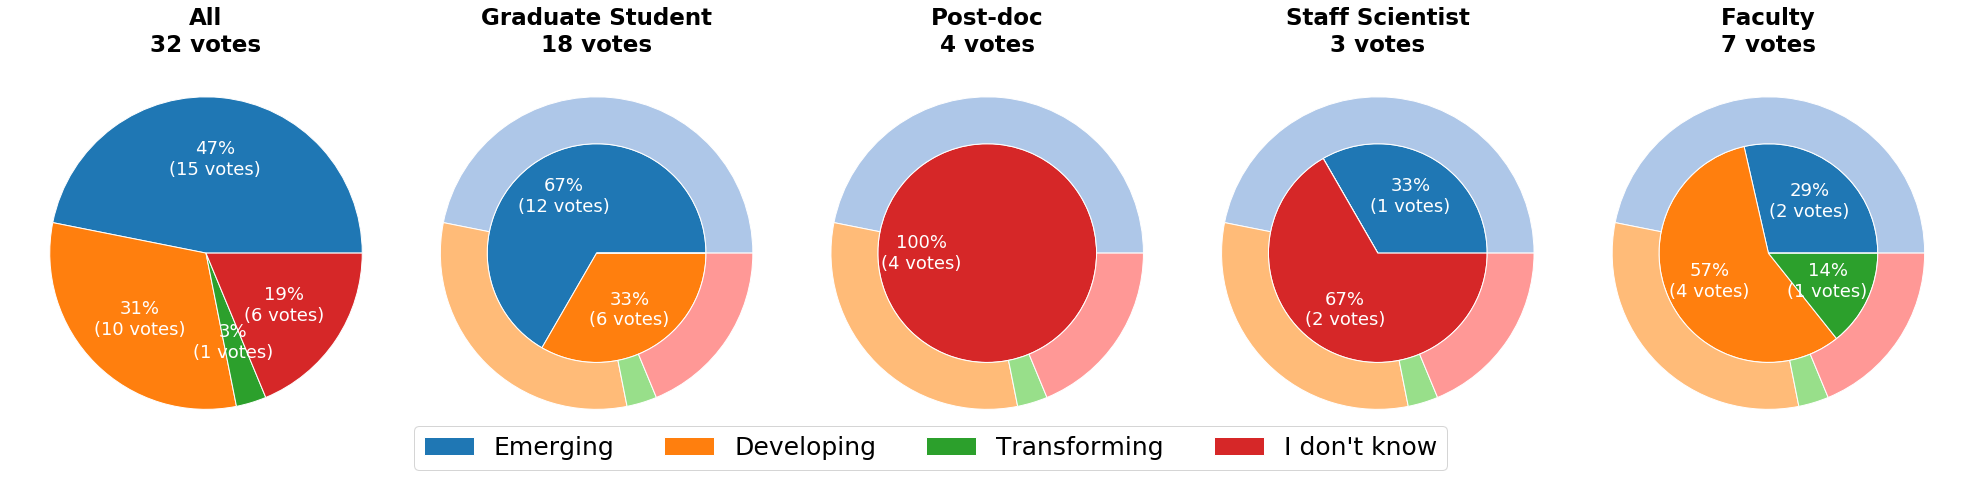

Family-friendly policies


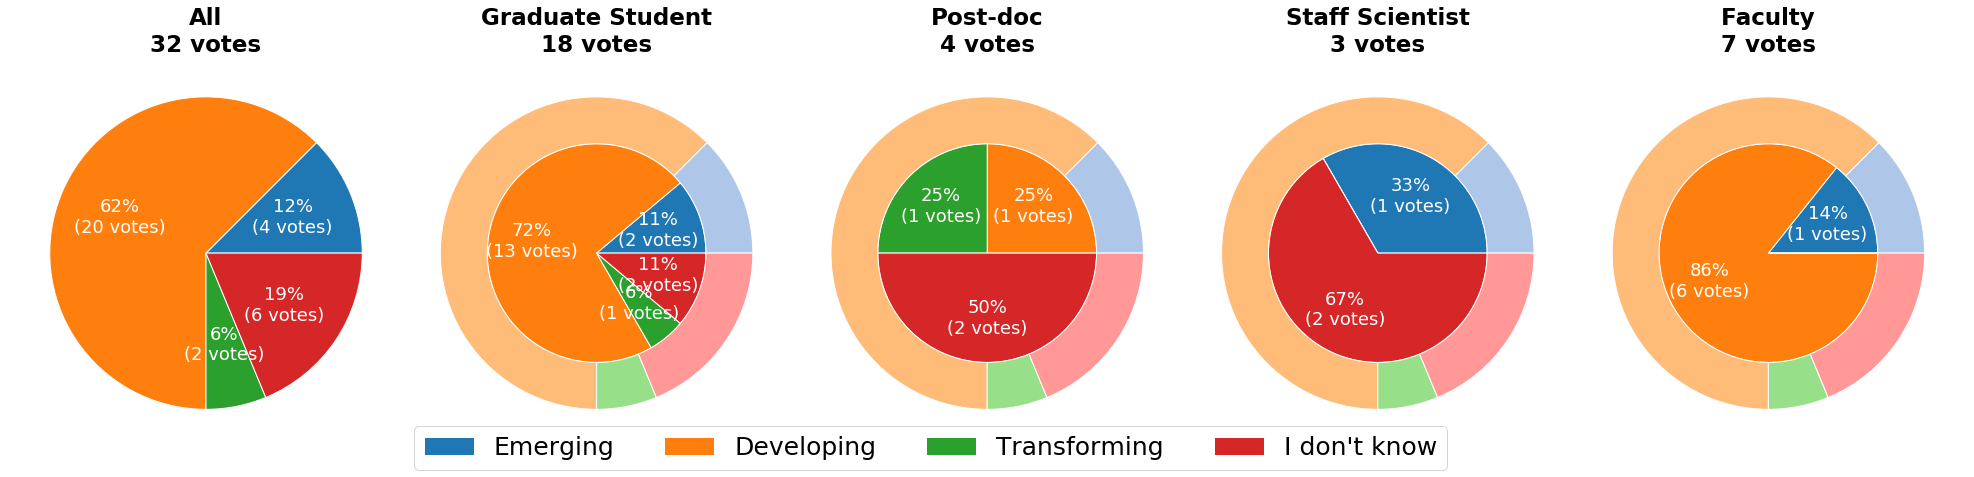

Communications


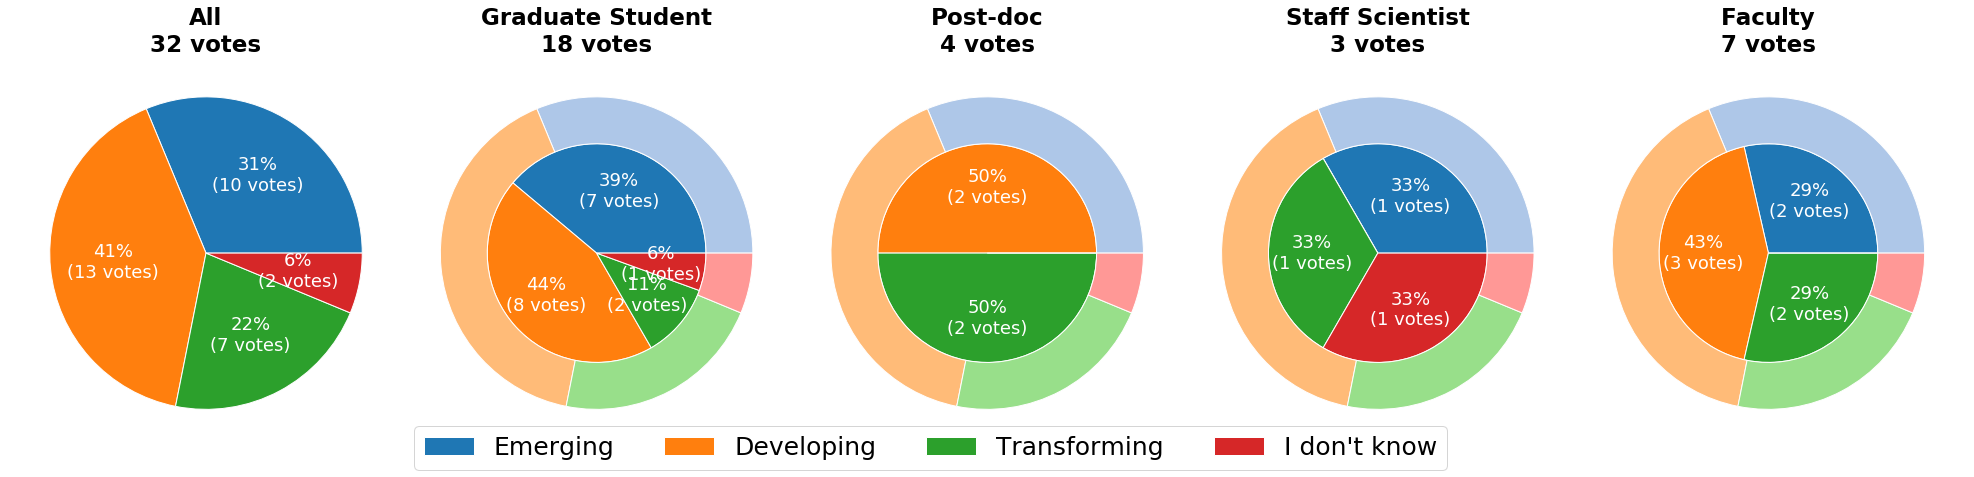

Training


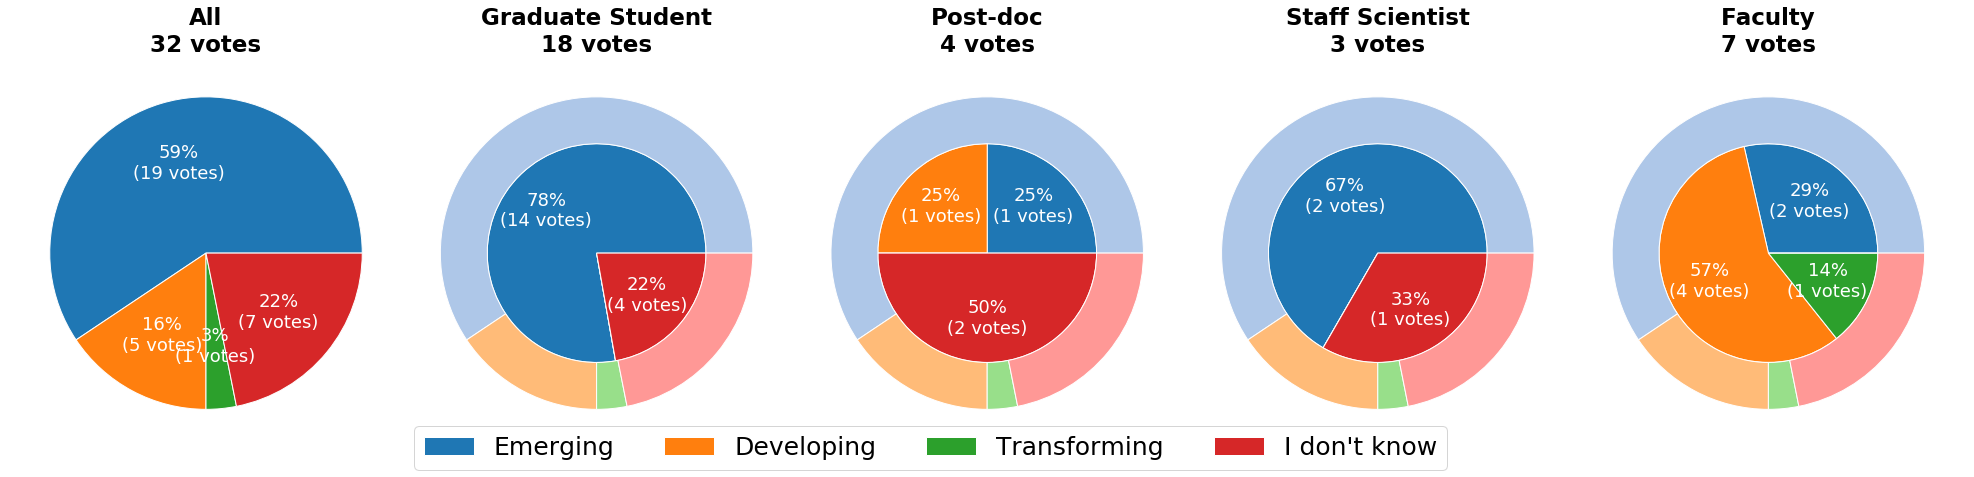

Ending workplace harassment and bullying


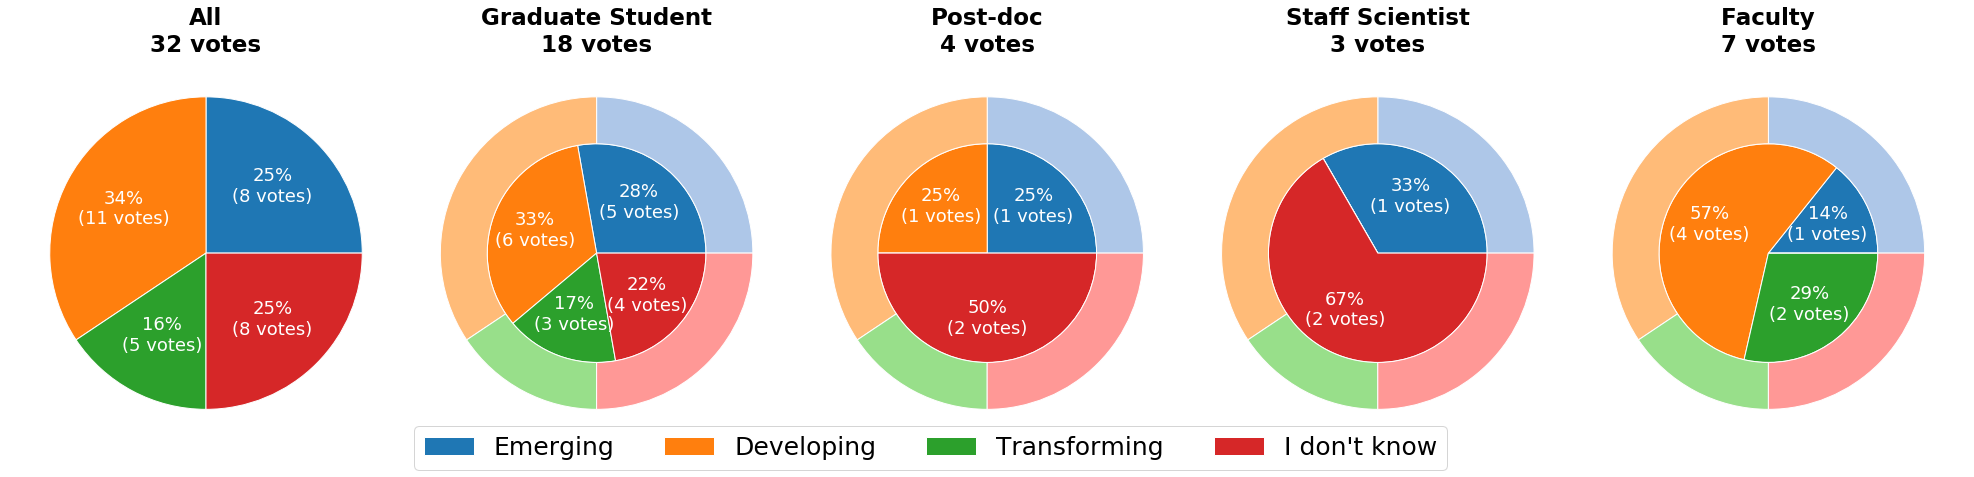

Creating welcoming environments


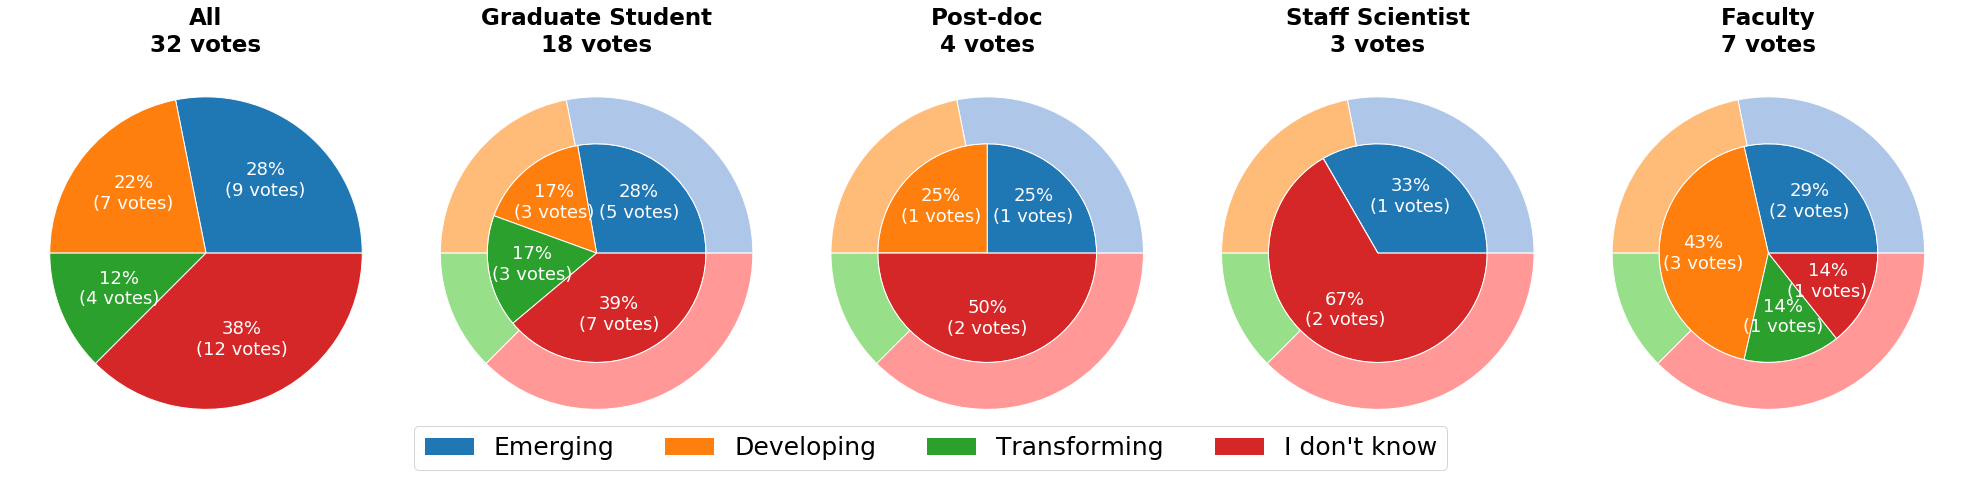

Community dialogues


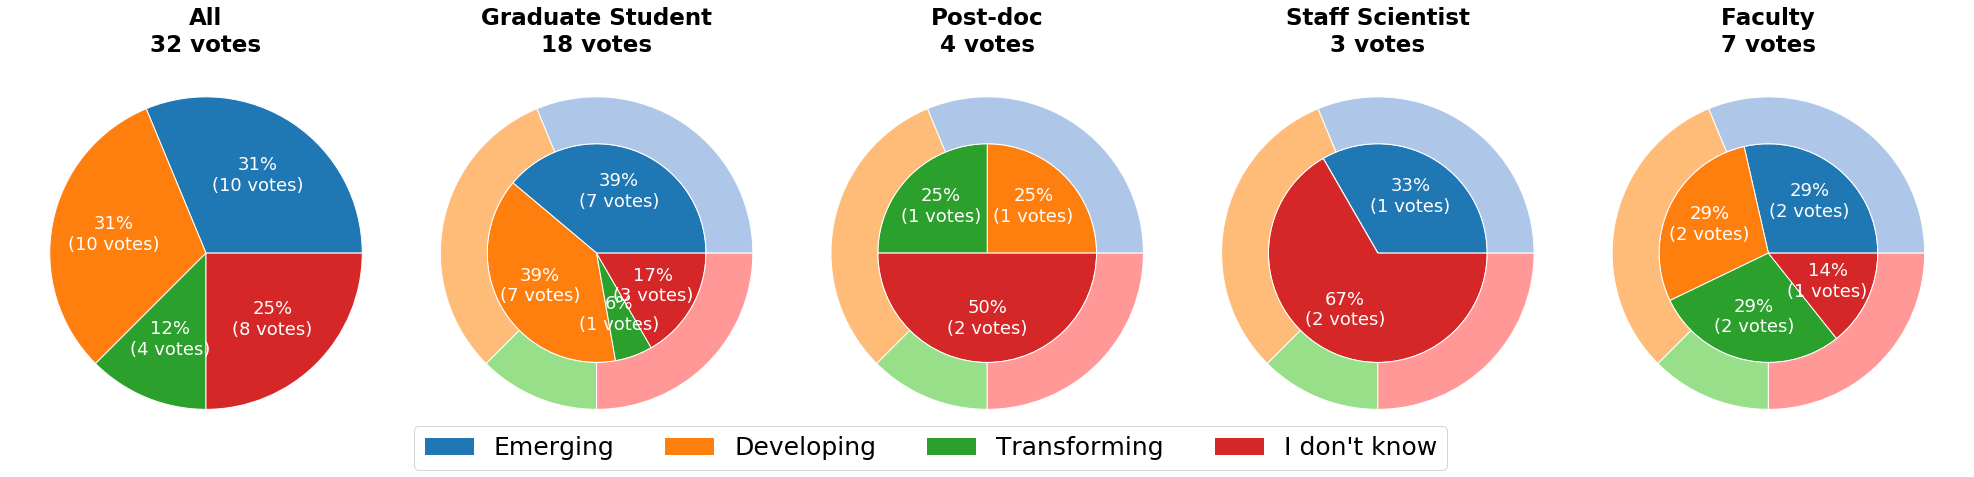

Faculty hiring


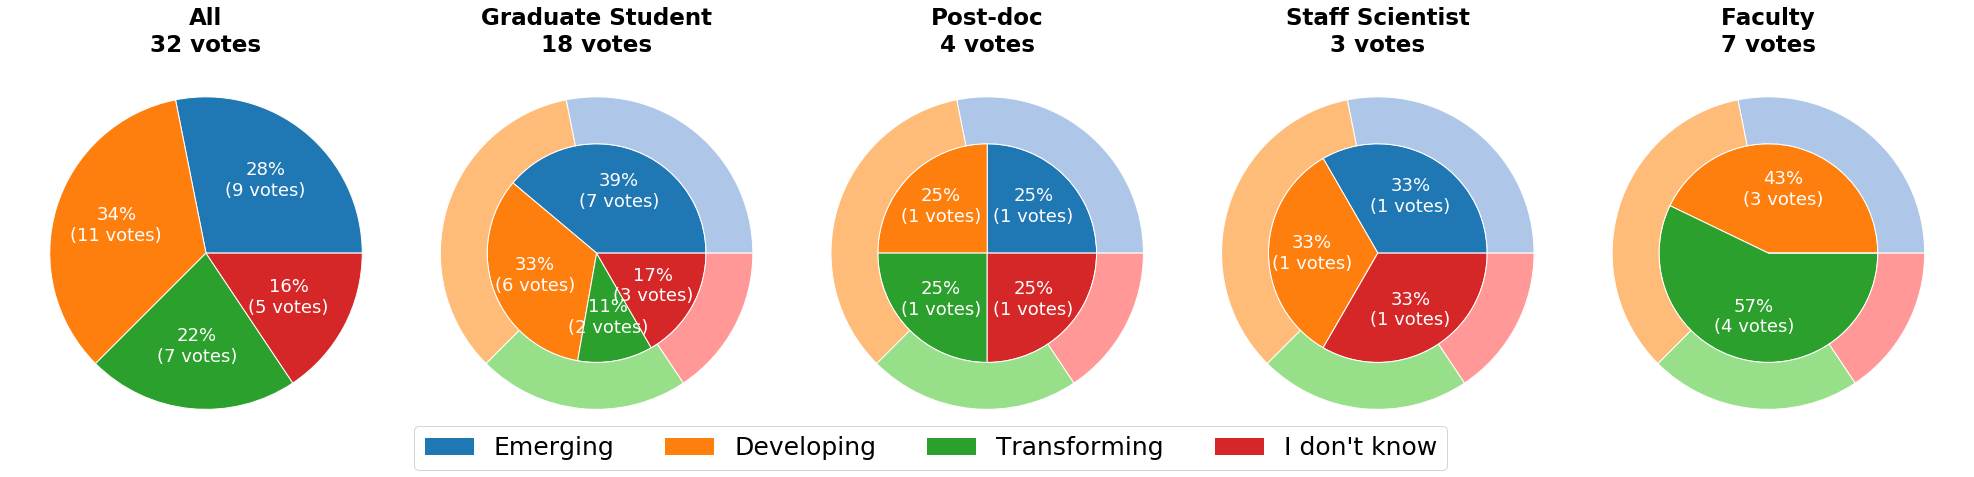

Department internal review


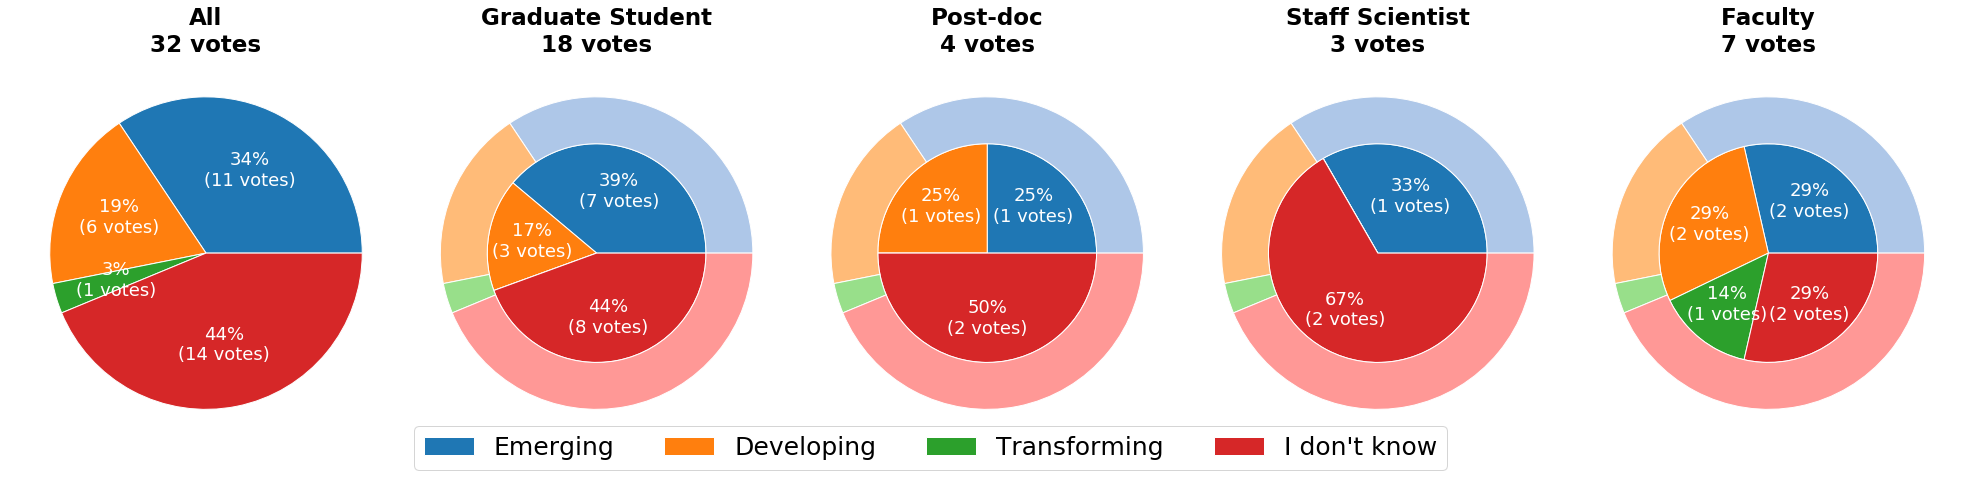

Department external review


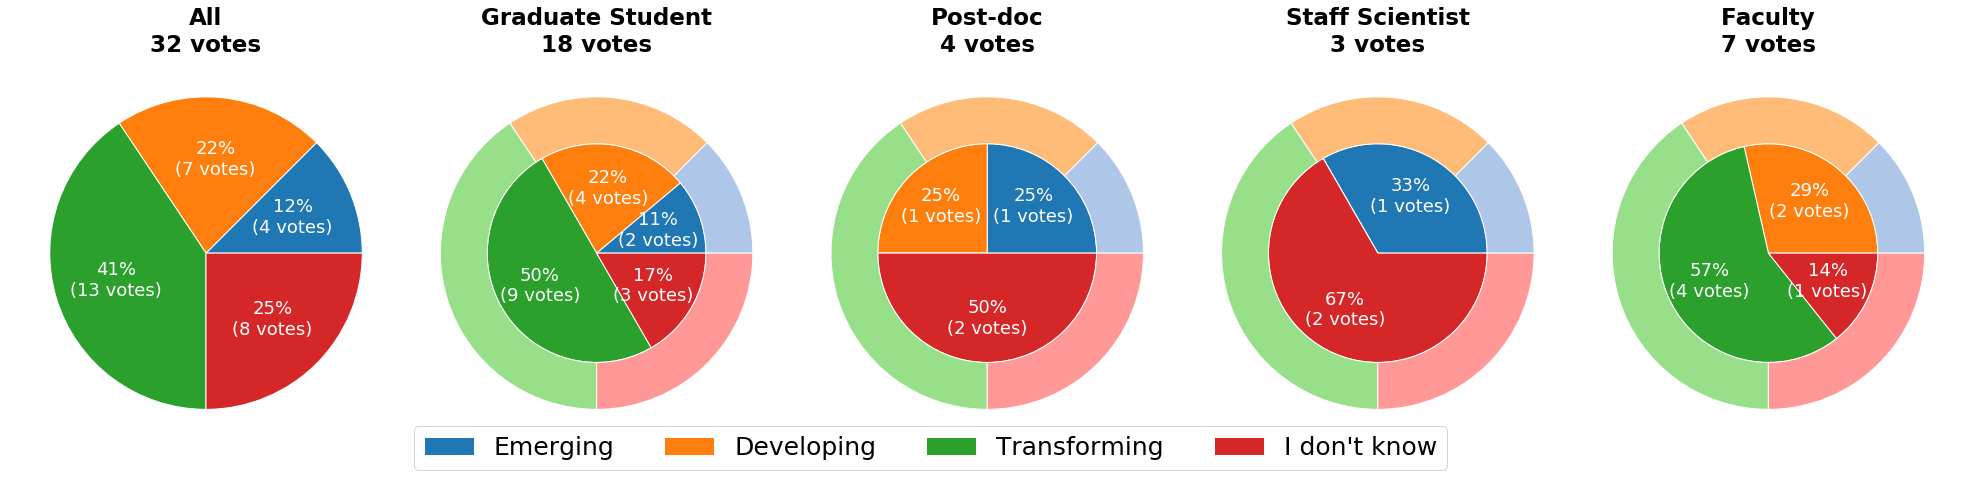

Individual performance review


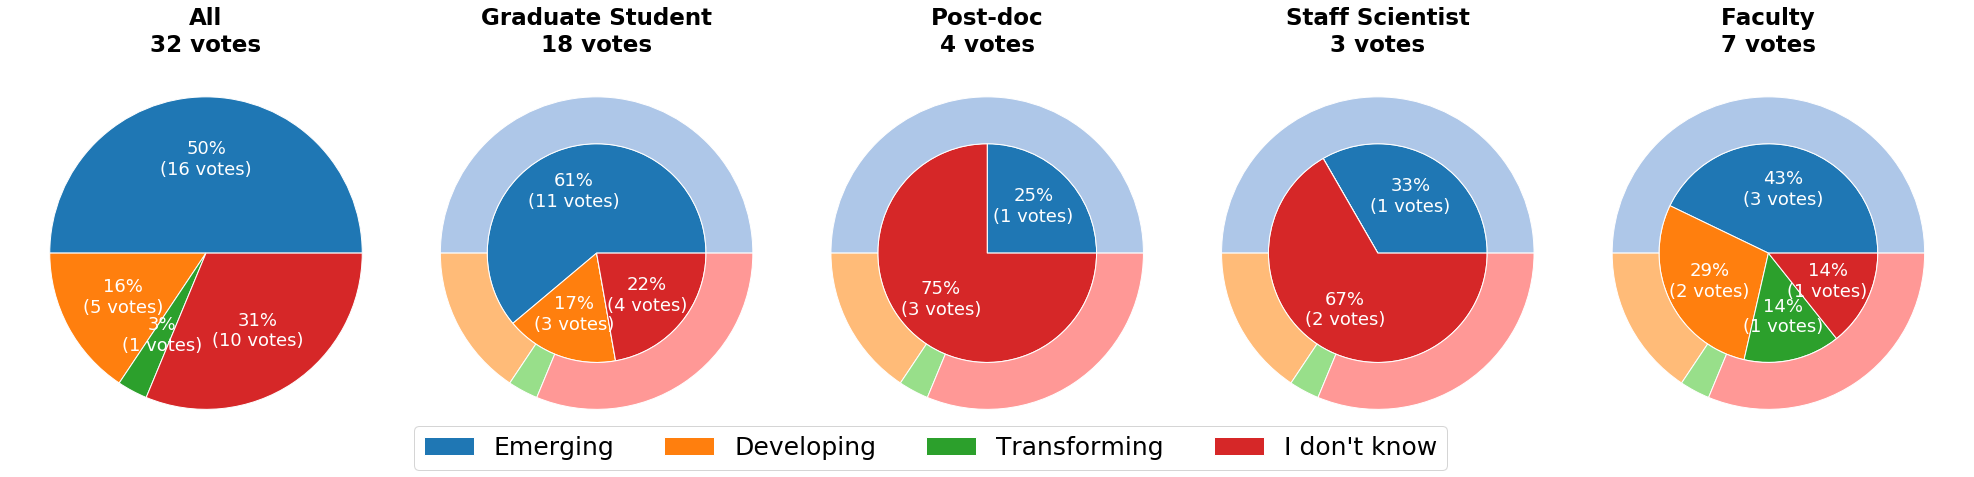

Data collection


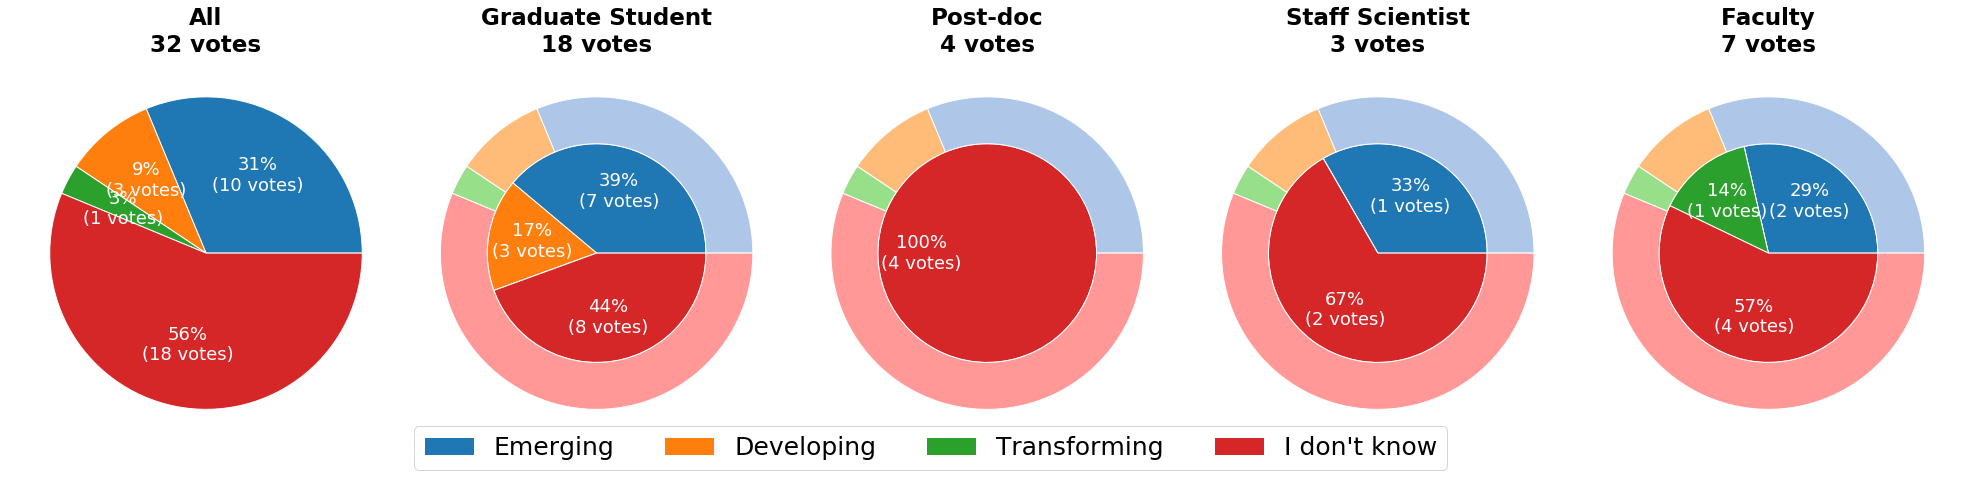

Strategic planning and response


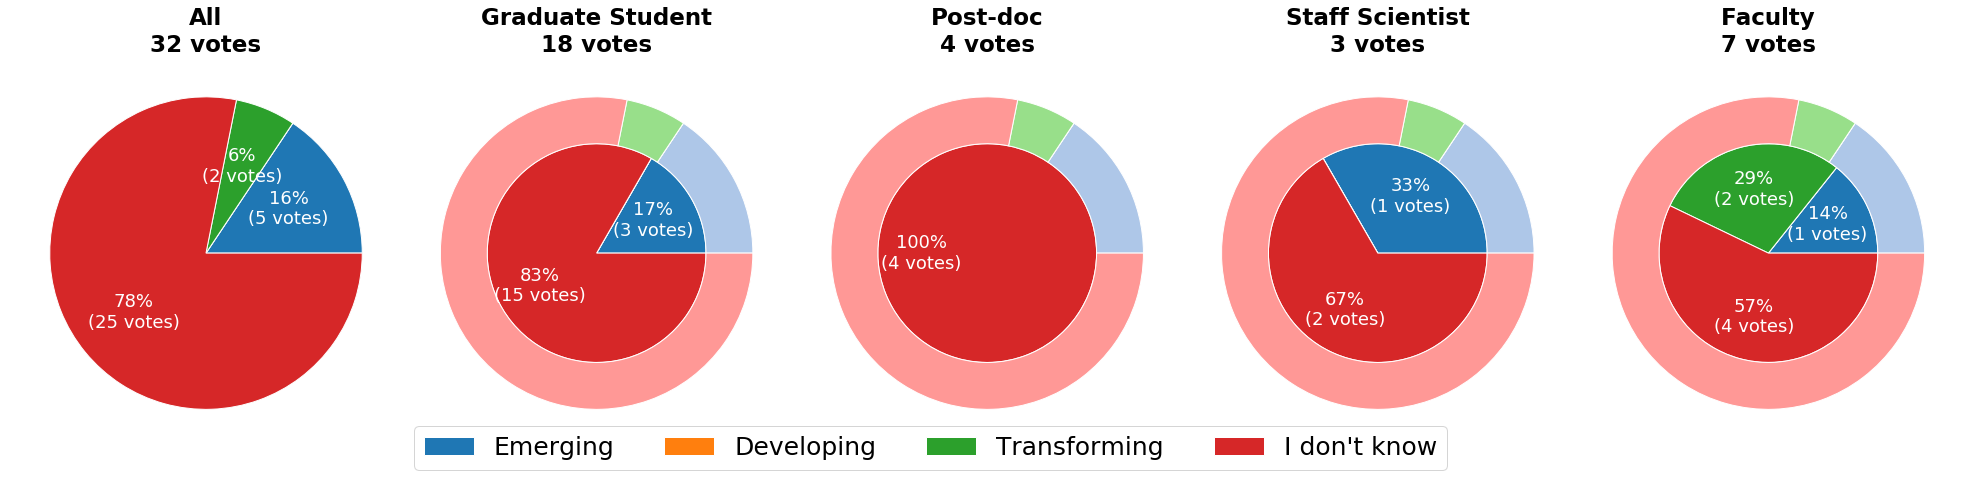

Internal reporting


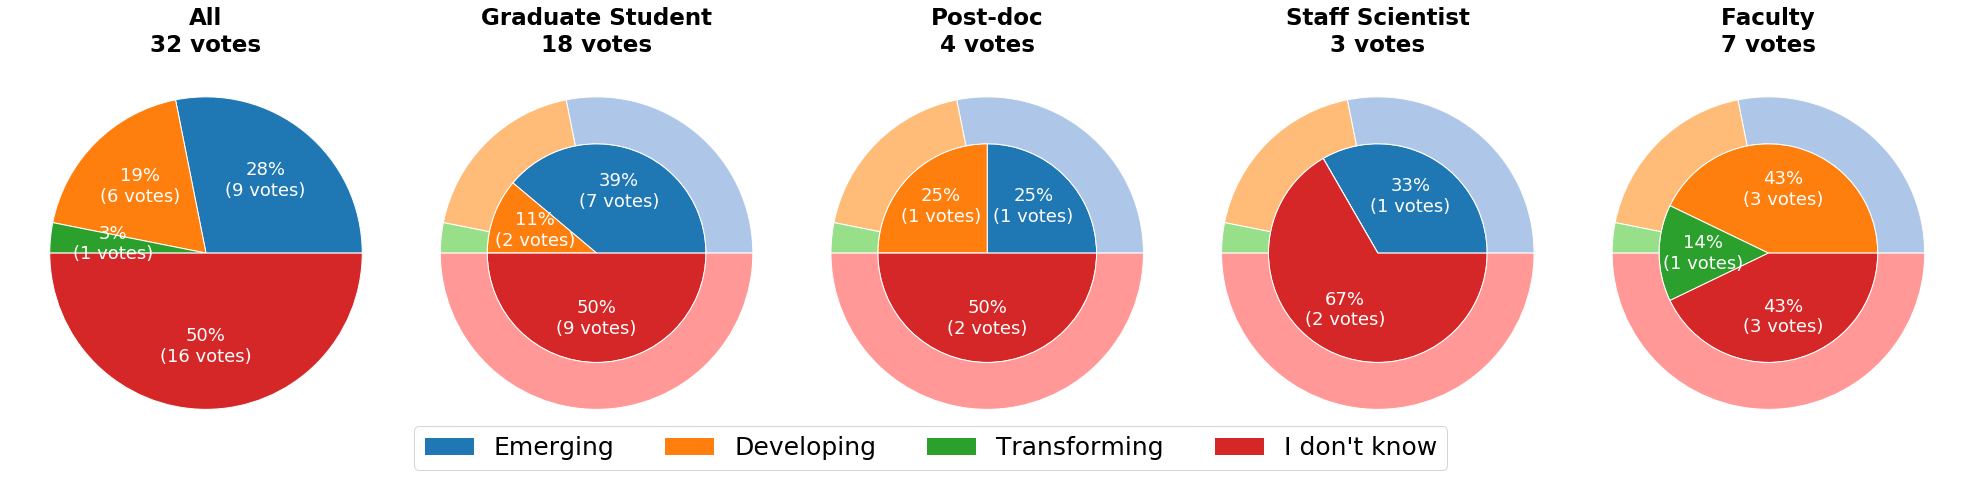

Public reporting


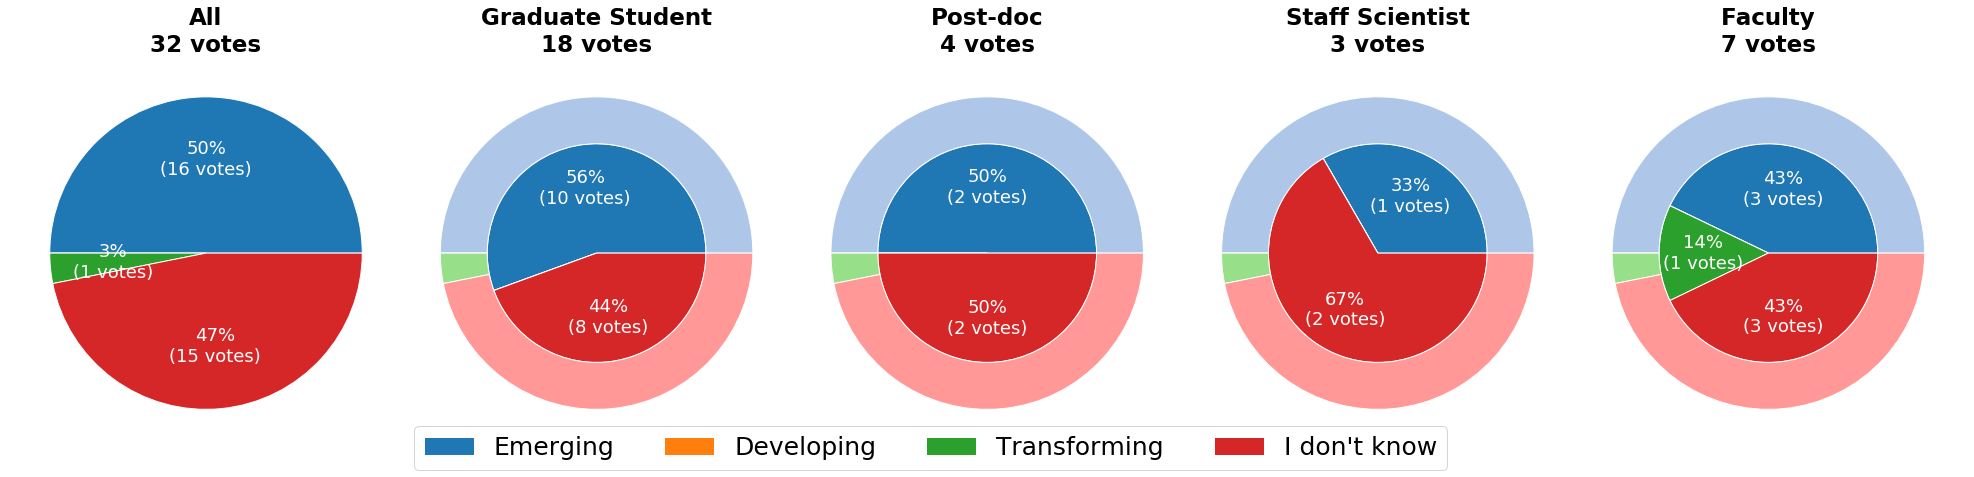

Certification


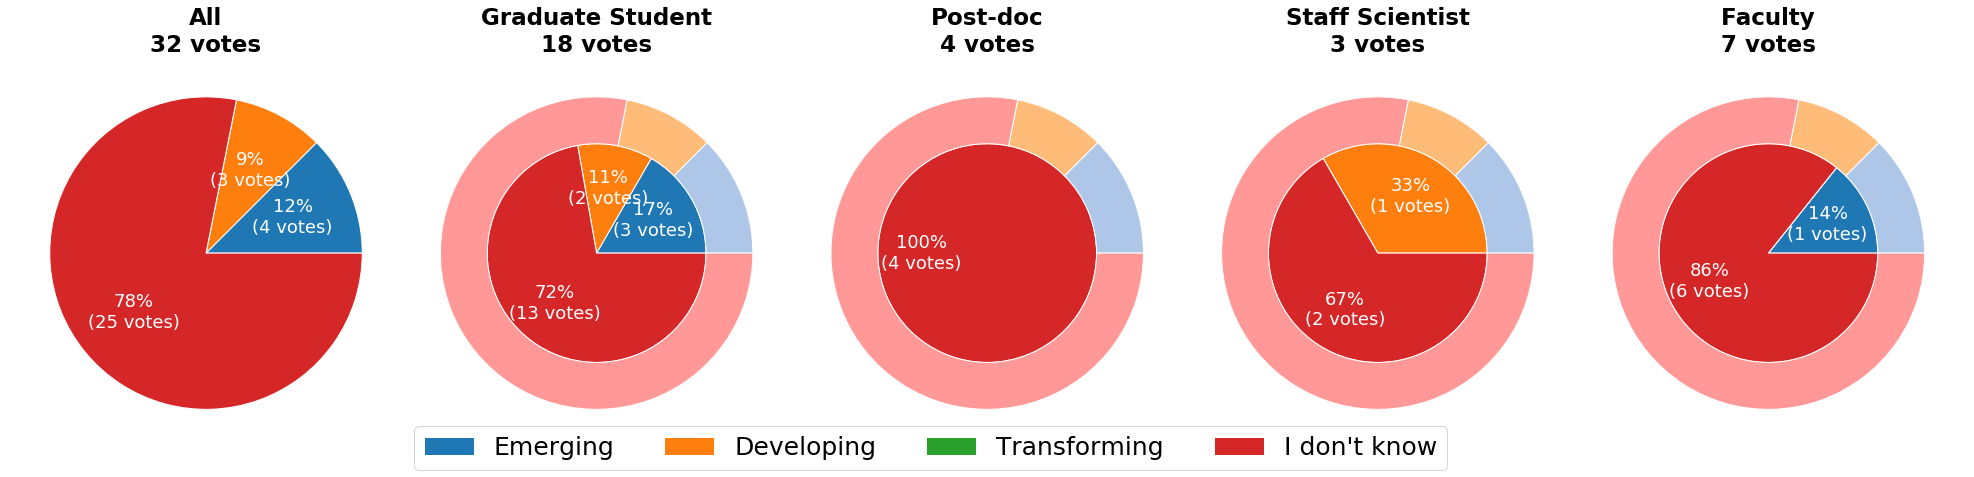

Sustainability


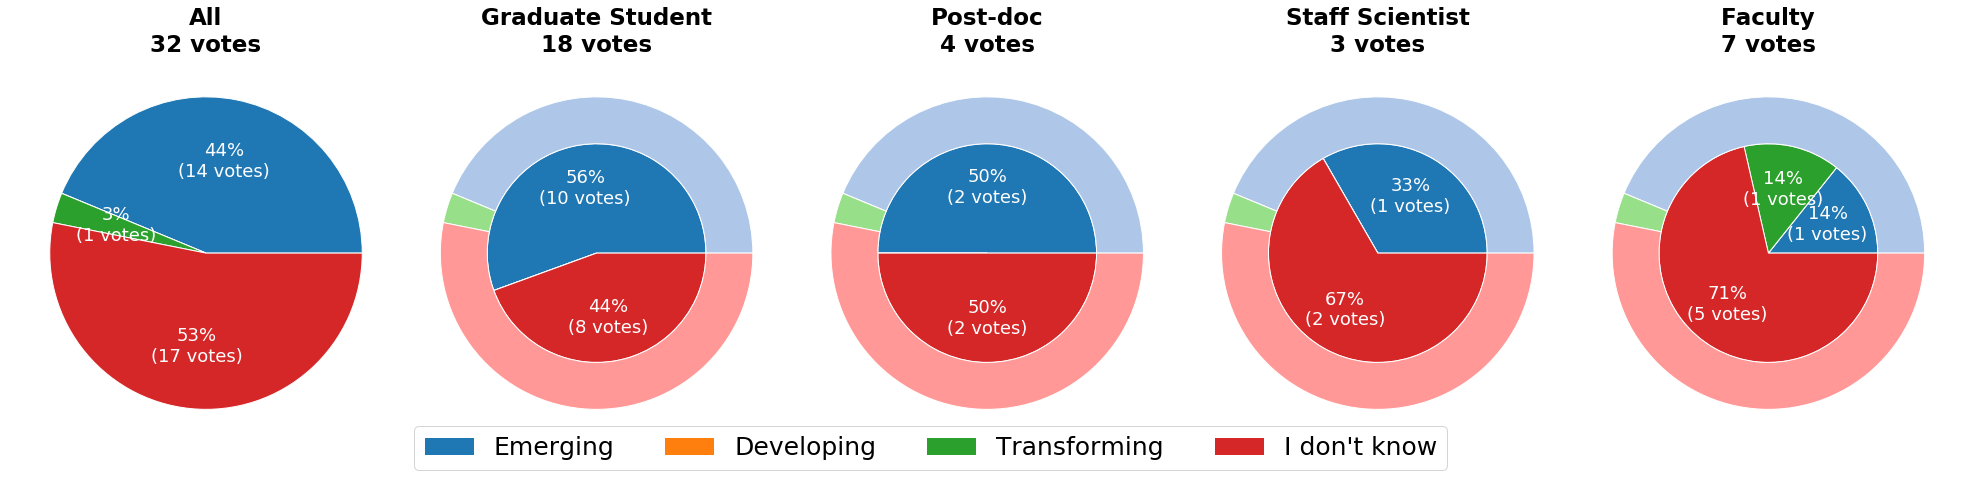

In [95]:
for question in questions:
    print(question)
    fig, axes = plt.subplots(1,5, figsize=[35,10], gridspec_kw=dict(wspace=0))


    for ax, label in zip(axes,['All', 'Graduate Student', 'Post-doc', 'Staff Scientist', 'Faculty']):

        if label == 'All':
            df_group = df
            df_values_all = dataframe_values(df_group)[question]

            df_values_all = labels_in_order(df_values_all)
            
            ax.pie(df_values_all.values(), autopct=lambda pct: func(pct, df_values_all.values()),
                radius=1, colors=inner_colors,
                wedgeprops=dict(edgecolor='w'),  textprops=dict(color="w", fontsize=18))
            ax.set(aspect="equal")
            ax.set_title(label+'\n{0} votes'.format(sum(df_values_all.values())), fontsize=23, fontweight='bold')

        else:
            df_group = df.loc[label]

            df_group_values = dataframe_values(df_group)[question]
            df_group_values = labels_in_order(df_group_values)

            ax.pie(df_group_values.values(), autopct=lambda pct: func(pct, df_group_values.values()),
                radius=1-size, colors=inner_colors,
                wedgeprops=dict(edgecolor='w'), textprops=dict(color="w", fontsize=18))
            ax.pie(df_values_all.values(), radius=1, colors=outer_colors,
                   wedgeprops=dict(width=size, edgecolor='w'))
            ax.set(aspect="equal")
            ax.set_title(label+'\n{0} votes'.format(sum(df_group_values.values())), fontsize=23, fontweight='bold')



    plt.legend(labels = ['Emerging', 'Developing', 'Transforming', "I don't know"], ncol=4,
                  bbox_to_anchor=(0.7, 0.28), bbox_transform=plt.gcf().transFigure, fontsize=25)
    # fig.tight_layout()

    plt.savefig('plots/{0}.png'.format(question), bbox_inches='tight')

    plt.show()

# get totals for each section 

In [96]:
sections = ['Recruiting and Admissions', 'Mentoring', 'Doctoral Program and Process', 'Departmental Climate',
           'Assessment', 'Accountability']
question_indices = [0, 5, 11, 16, 21, 25,31]

Recruiting and Admissions


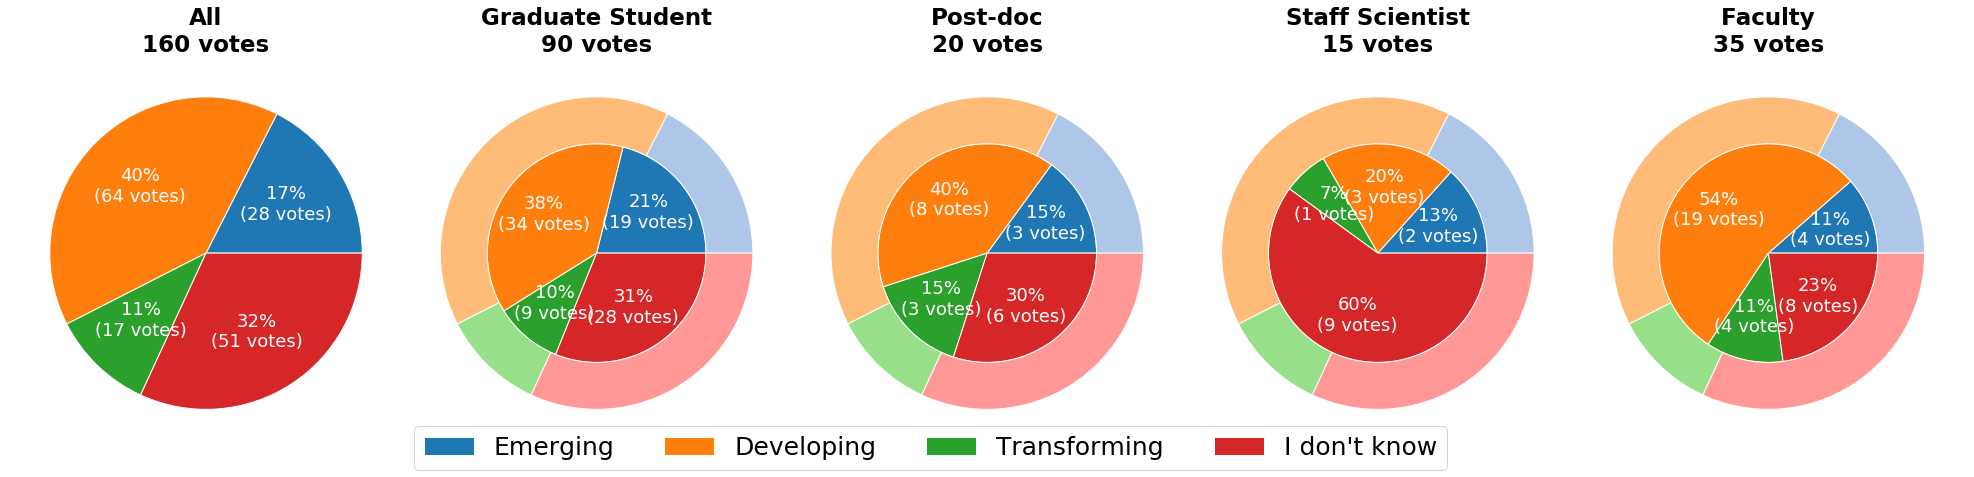

Mentoring


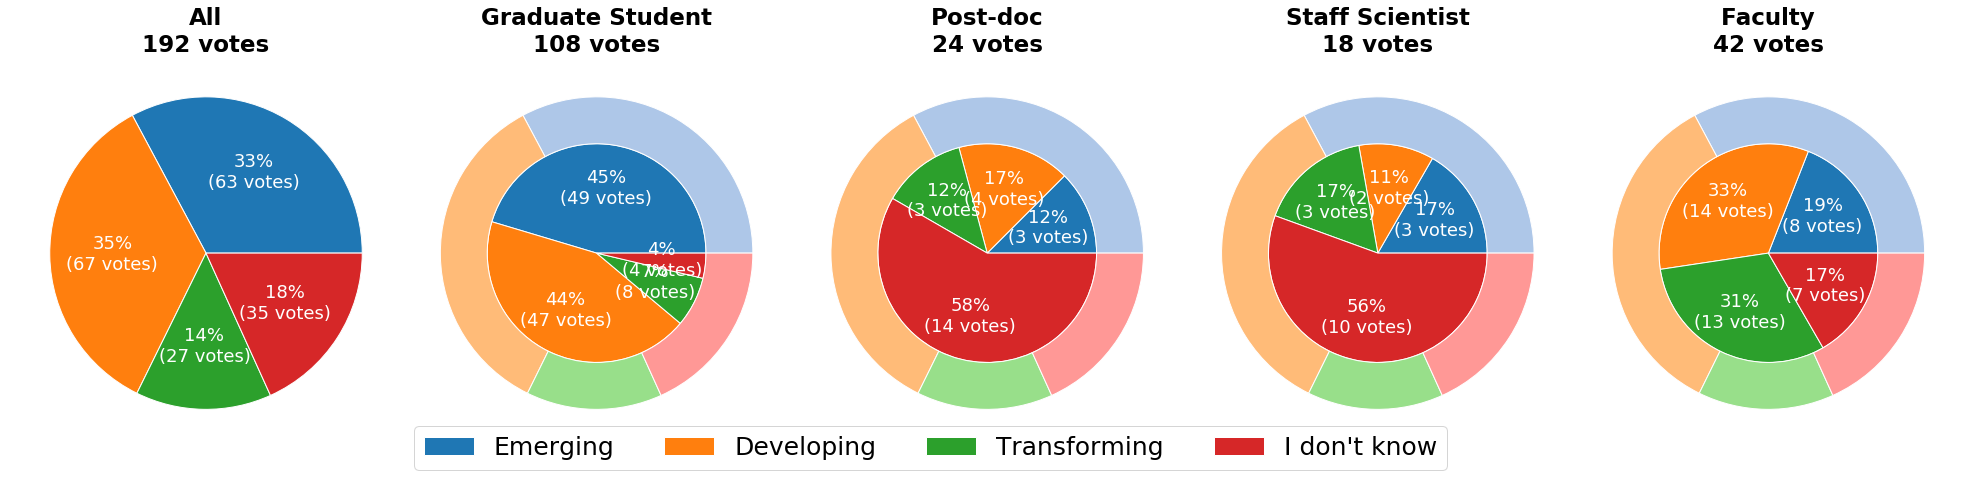

Doctoral Program and Process


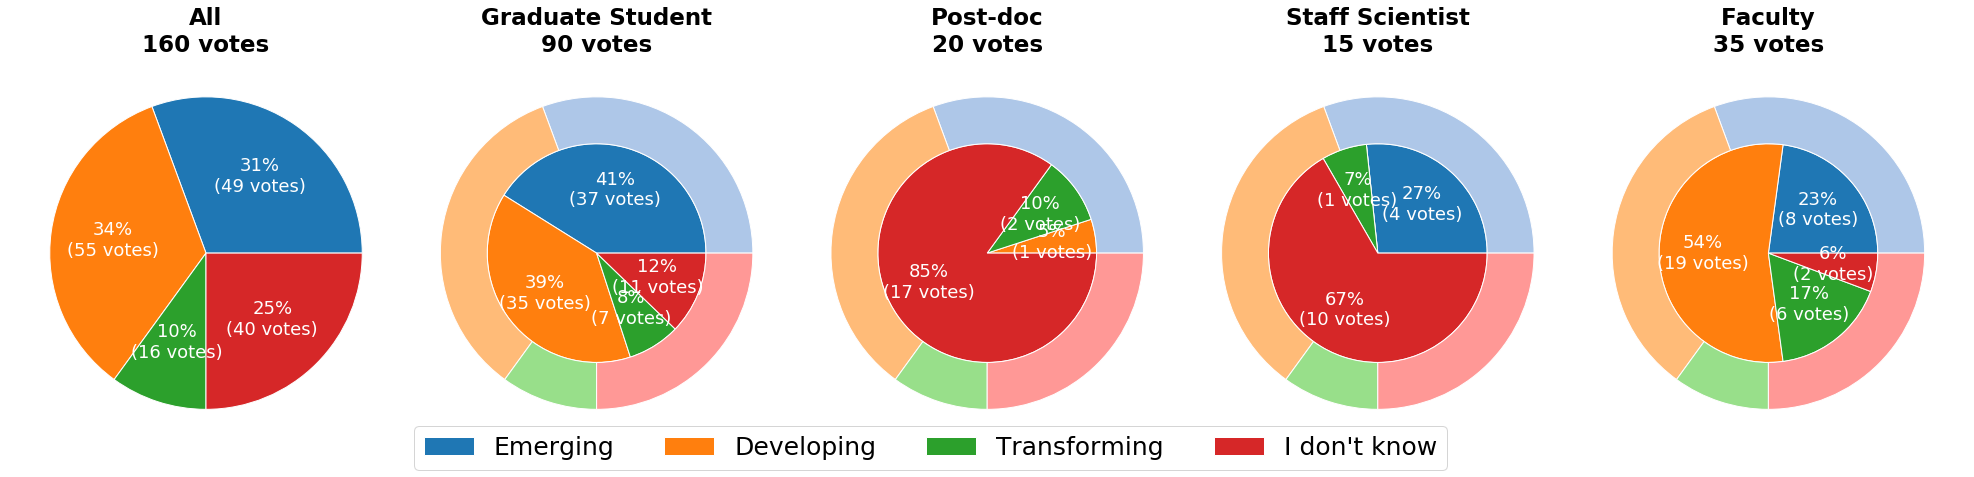

Departmental Climate


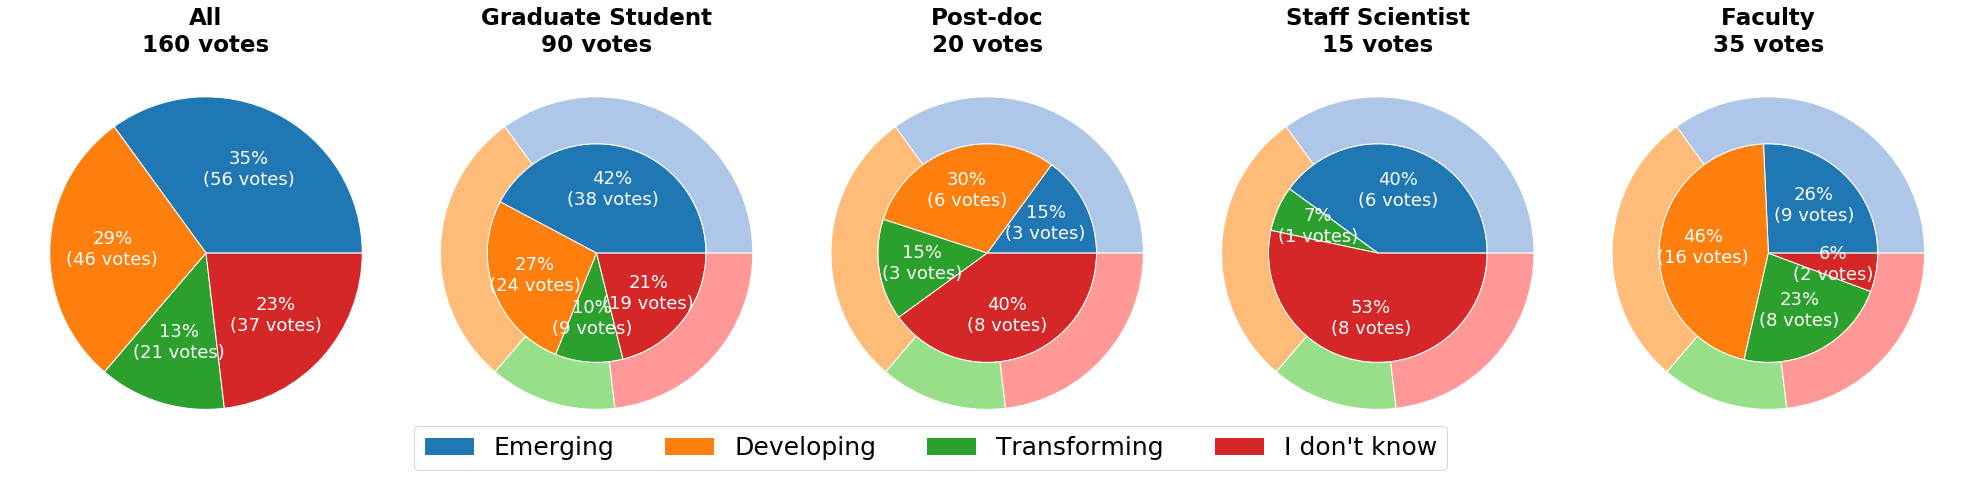

Assessment


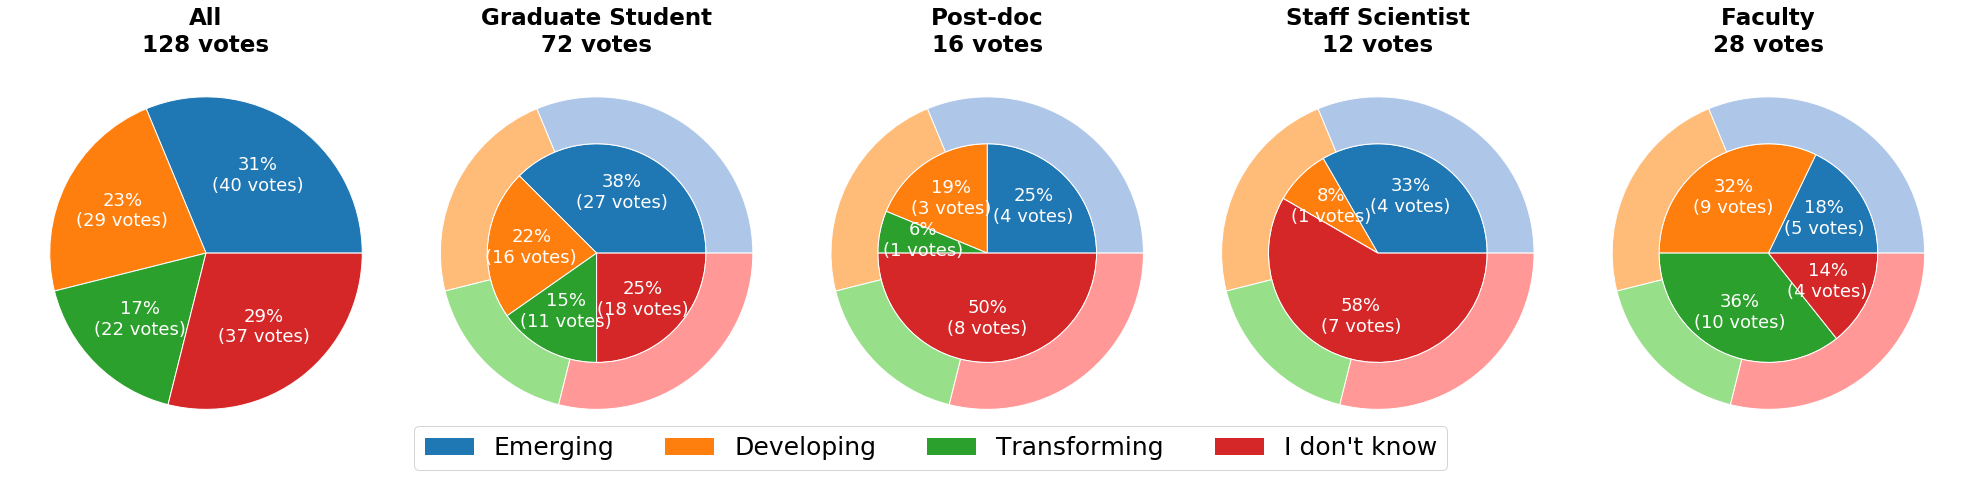

Accountability


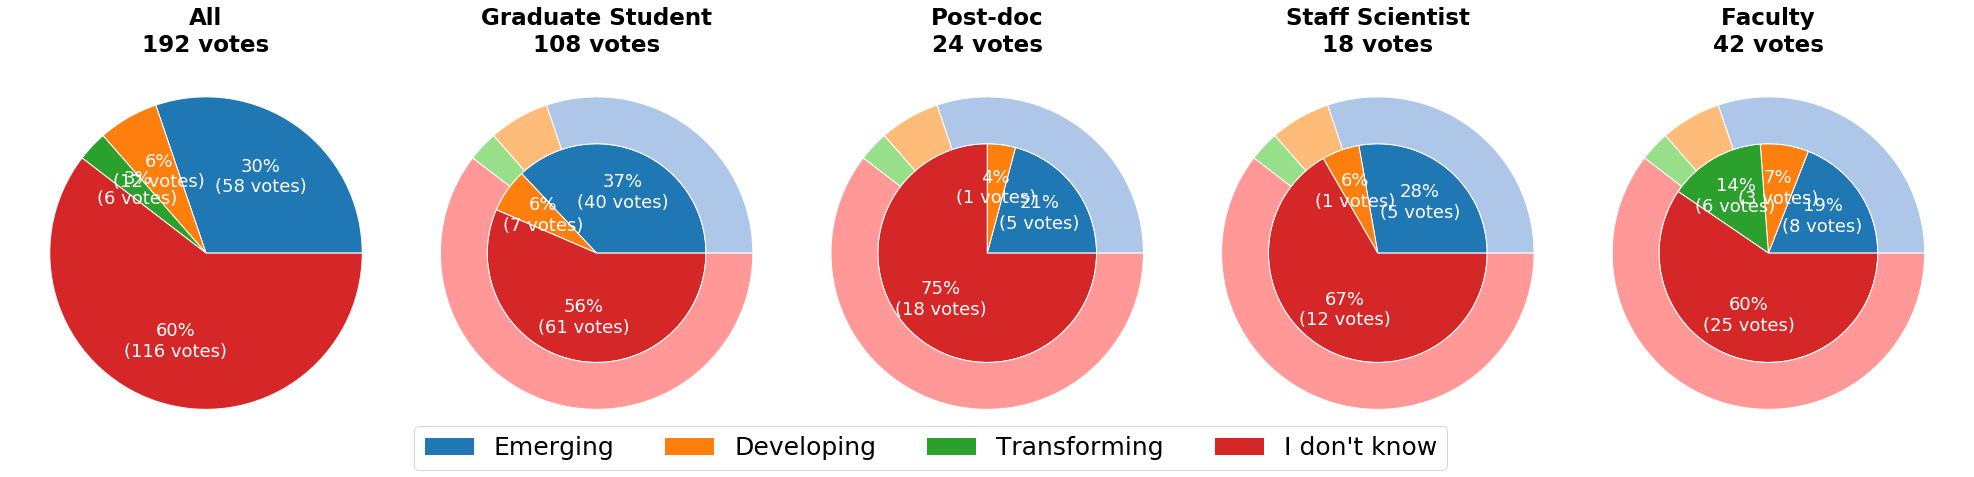

In [97]:
for i,section in enumerate(sections):
    
    print(section)

    start, stop =question_indices[i], question_indices[i+1]
    
    
    
    fig, axes = plt.subplots(1,5, figsize=[35,10], gridspec_kw=dict(wspace=0))


    for ax, label in zip(axes,['All', 'Graduate Student', 'Post-doc', 'Staff Scientist', 'Faculty']):

        if label == 'All':
            df_group = df
            counters = [Counter(dataframe_values(df_group)[questions[j]]) for j in np.arange(start, stop)]
            df_values_all = sum(counters, Counter()) #summed counters
            
            df_values_all = labels_in_order(df_values_all)

            ax.pie(df_values_all.values(), autopct=lambda pct: func(pct, df_values_all.values()),
                radius=1, colors=inner_colors,
                wedgeprops=dict(edgecolor='w'),  textprops=dict(color="w", fontsize=18))
            ax.set(aspect="equal")
            ax.set_title(label+'\n{0} votes'.format(sum(df_values_all.values())), fontsize=23, fontweight='bold')

        else:
            df_group = df.loc[label]
            counters = [Counter(dataframe_values(df_group)[questions[j]]) for j in np.arange(start, stop)]
            df_group_values = sum(counters, Counter())
            
            df_group_values = labels_in_order(df_group_values)

            ax.pie(df_group_values.values(), autopct=lambda pct: func(pct, df_group_values.values()),
                radius=1-size, colors=inner_colors,
                wedgeprops=dict(edgecolor='w'), textprops=dict(color="w", fontsize=18))
            ax.pie(df_values_all.values(), radius=1, colors=outer_colors,
                   wedgeprops=dict(width=size, edgecolor='w'))
            ax.set(aspect="equal")
            ax.set_title(label+'\n{0} votes'.format(sum(df_group_values.values())), fontsize=23, fontweight='bold')



    plt.legend(labels = ['Emerging', 'Developing', 'Transforming', "I don't know"], ncol=4,
                  bbox_to_anchor=(0.7, 0.28), bbox_transform=plt.gcf().transFigure, fontsize=25)
    # fig.tight_layout()

    plt.savefig('plots/{0}.png'.format(section), bbox_inches='tight')

    plt.show()
                        
                      

## get totals for all 

Counter({"I don't know": 316, 'Emerging': 294, 'Developing': 273, 'Transforming': 109})


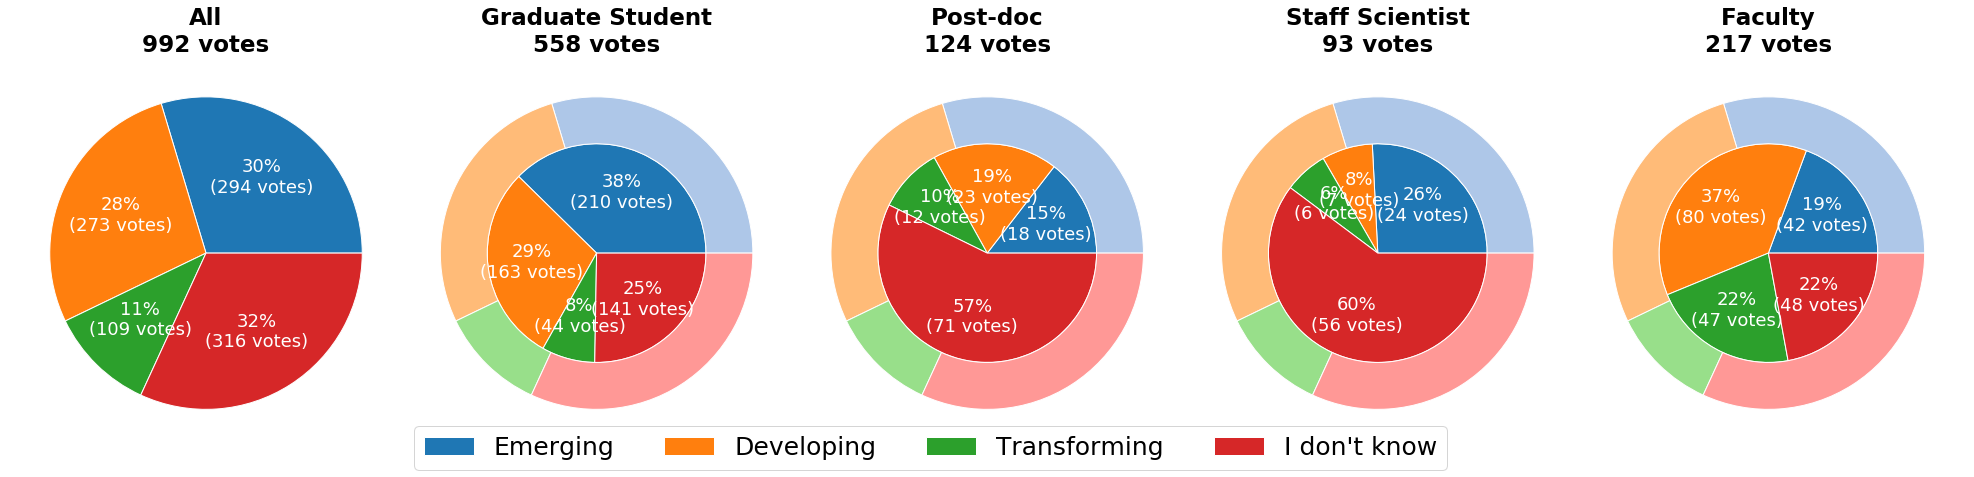

In [98]:
section = 'grand_total'

start, stop =question_indices[0], question_indices[-1]



fig, axes = plt.subplots(1,5, figsize=[35,10], gridspec_kw=dict(wspace=0))


for ax, label in zip(axes,['All', 'Graduate Student', 'Post-doc', 'Staff Scientist', 'Faculty']):

    if label == 'All':
        df_group = df
        counters = [Counter(dataframe_values(df_group)[questions[j]]) for j in np.arange(start, stop)]
        df_values_all = sum(counters, Counter()) #summed counters
        print(df_values_all)
        df_values_all = labels_in_order(df_values_all)

        ax.pie(df_values_all.values(), autopct=lambda pct: func(pct, df_values_all.values()),
            radius=1, colors=inner_colors,
            wedgeprops=dict(edgecolor='w'),  textprops=dict(color="w", fontsize=18))
        ax.set(aspect="equal")
        ax.set_title(label+'\n{0} votes'.format(sum(df_values_all.values())), fontsize=23, fontweight='bold')

    else:
        df_group = df.loc[label]
        counters = [Counter(dataframe_values(df_group)[questions[j]]) for j in np.arange(start, stop)]
        df_group_values = sum(counters, Counter())

        df_group_values = labels_in_order(df_group_values)

        ax.pie(df_group_values.values(), autopct=lambda pct: func(pct, df_group_values.values()),
            radius=1-size, colors=inner_colors,
            wedgeprops=dict(edgecolor='w'), textprops=dict(color="w", fontsize=18))
        ax.pie(df_values_all.values(), radius=1, colors=outer_colors,
               wedgeprops=dict(width=size, edgecolor='w'))
        ax.set(aspect="equal")
        ax.set_title(label+'\n{0} votes'.format(sum(df_group_values.values())), fontsize=23, fontweight='bold')



plt.legend(labels = ['Emerging', 'Developing', 'Transforming', "I don't know"], ncol=4,
              bbox_to_anchor=(0.7, 0.28), bbox_transform=plt.gcf().transFigure, fontsize=25)
# fig.tight_layout()

plt.savefig('plots/{0}.png'.format(section), bbox_inches='tight')

plt.show()

                      